# Import library
Import library-library yang akan digunakan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import statistics as st
import seaborn as sns
import time
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score, make_scorer

C:\Users\Made Raditya\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Made Raditya\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Made Raditya\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Import metadata
Import metadata.csv untuk mengetahui keterangan dari tiap variabel. Nantinya keterangan ini akan digunakan sebagai nama kolom untuk train.csv

In [2]:
metadata = pd.read_csv("Metadata DSC.csv")
metadata

,Variabel,Keterangan
0,DC024,province
1,DC025,type of place of residence
2,DC201,water feasibility category
3,DC205,type of toilet facility
4,DC206,has electricity
5,DC207,has radio
6,DC208,has television
7,DC209,has refrigerator
8,DC210,has bicycle
9,DC211,has motorcycle/scooter


In [3]:
metadata.shape

(39, 2)

# Import data latih
Import data latih yaitu train.csv dan mengganti tiap nama kolomnya dengan keterangan pada metadata

In [4]:
data = pd.read_csv("train.csv")
#data.drop(["id"], axis=1, inplace=True) #Kolom ID memiliki pengaruh yang penting dalam model ini
data

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,47958,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,1,21.0,9.0,Layak Minum
35969,47959,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,12.0,Layak Minum
35970,47961,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,48.0,Layak Minum
35971,47962,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,39.0,Layak Minum


In [5]:
df = data.rename(columns = dict(zip(metadata['Variabel'], metadata['Keterangan'])))
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) #Kita perlu menghapus semua keunikan kata termasuk spasi agar dapat digunakan pada model LGBM
df

,id,province,typeofplaceofresidence,typeoftoiletfacility,haselectricity,hasradio,hastelevision,hasrefrigerator,hasbicycle,hasmotorcyclescooter,...,waterusuallytreatedbyletitstandandsettle,foodcookedinthehouseseparatebuildingoutdoors,householdhasseparateroomusedaskitchen,ownslandusableforagriculture,ownslivestockherdsorfarmanimals,frequencyhouseholdmemberssmokeinsidethehouse,wealthindexforurbanrural,typeoftoiletfacility2,whatisthefloorareaofthishouseinsquaremeters,waterfeasibilitycategory
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,47958,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,1,21.0,9.0,Layak Minum
35969,47959,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,12.0,Layak Minum
35970,47961,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,48.0,Layak Minum
35971,47962,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,39.0,Layak Minum


In [6]:
print("Dataset berukuran {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset berukuran 35973 baris dan 40 kolom


In [7]:
# Persentase label kategori layak minum dan tidak layak minum
# Dalam hal ini sangat tidak seimbang dimana memiliki proporsi 0.9:0.1
print("Presentase label Layak Minum adalah {:.2%}".format(32398/df.shape[0]))
print("Presentase label Tidak Layak Minum adalah {:.2%}".format(3572/df.shape[0]))

Presentase label Layak Minum adalah 90.06%
Presentase label Tidak Layak Minum adalah 9.93%


In [8]:
# Fungsi missing check
# Fungsi ini digunakan untuk mengecek jumlah missing value, keunikan tiap kolom
def missing_check(df) :
    wadah = []
    for i in df.columns :
        wadah.append(df[i].unique())
    missing = df.isnull().sum()
    per_miss = missing/len(df)
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing":missing,
                        "Percent_Missing":per_miss,
                        "Data_Types":data_type,
                        "Number_of_unique":number_unique,
                        "Unique":wadah}).style.format({'Percent_Missing': "{:.2%}"})

In [9]:
missing_check(df)

,Missing,Percent_Missing,Data_Types,Number_of_unique,Unique
id,0,0.00%,int64,35973,[ 1 2 3 ... 47961 47962 47963]
province,0,0.00%,int64,34,[11 12 13 14 15 16 17 18 19 21 31 32 33 34 35 36 51 52 53 61 62 63 64 65 71 72 73 74 75 76 81 82 91 94]
typeofplaceofresidence,0,0.00%,int64,2,[2 1]
typeoftoiletfacility,11,0.03%,float64,6,[16. 31. 12. 21. 17. nan 96.]
haselectricity,21,0.06%,float64,2,[ 1. 0. nan]
hasradio,44,0.12%,float64,2,[ 0. 1. nan]
hastelevision,13,0.04%,float64,2,[ 1. 0. nan]
hasrefrigerator,18,0.05%,float64,2,[ 0. 1. nan]
hasbicycle,41,0.11%,float64,2,[ 0. 1. nan]
hasmotorcyclescooter,24,0.07%,float64,2,[ 0. 1. nan]


In [10]:
# Analisis Statistik Deskriptif terhadap data
df.describe()

,id,province,typeofplaceofresidence,typeoftoiletfacility,haselectricity,hasradio,hastelevision,hasrefrigerator,hasbicycle,hasmotorcyclescooter,...,waterusuallytreatedbysolardisinfection,waterusuallytreatedbyletitstandandsettle,foodcookedinthehouseseparatebuildingoutdoors,householdhasseparateroomusedaskitchen,ownslandusableforagriculture,ownslivestockherdsorfarmanimals,frequencyhouseholdmemberssmokeinsidethehouse,wealthindexforurbanrural,typeoftoiletfacility2,whatisthefloorareaofthishouseinsquaremeters
count,35973.000000,35973.000000,35973.000000,35962.000000,35952.000000,35929.000000,35960.000000,35955.000000,35932.000000,35949.000000,...,35936.000000,35936.000000,35361.000000,30599.000000,35969.000000,35964.000000,35959.000000,35973.000000,35962.000000,35921.000000
mean,24336.069775,43.229088,1.468601,14.986736,0.960086,0.189234,0.846858,0.569434,0.326700,0.758547,...,0.003451,0.198687,1.167303,0.826922,0.366288,0.379574,1.207014,2.699330,15.498637,82.668216
std,13828.886872,23.585684,0.499020,6.061058,0.195761,0.391700,0.360130,0.495162,0.469013,0.427970,...,0.158921,0.425478,0.457907,0.378320,0.481796,0.485288,1.228101,1.435673,9.598043,91.194377
min,1.000000,11.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000
25%,12341.000000,31.000000,1.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,42.000000
50%,24787.000000,35.000000,1.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,11.000000,63.000000
75%,36131.000000,64.000000,2.000000,16.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,96.000000
max,47963.000000,94.000000,2.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000,8.000000,6.000000,1.000000,1.000000,1.000000,4.000000,5.000000,96.000000,998.000000


In [11]:
# Selain kolom water feasibility category, semuanya bertype int atau float
# sehingga tidak perlu dilakukan encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35973 non-null  int64  
 1   province                                      35973 non-null  int64  
 2   typeofplaceofresidence                        35973 non-null  int64  
 3   typeoftoiletfacility                          35962 non-null  float64
 4   haselectricity                                35952 non-null  float64
 5   hasradio                                      35929 non-null  float64
 6   hastelevision                                 35960 non-null  float64
 7   hasrefrigerator                               35955 non-null  float64
 8   hasbicycle                                    35932 non-null  float64
 9   hasmotorcyclescooter                          35949 non-null 

# Visualisasi Data

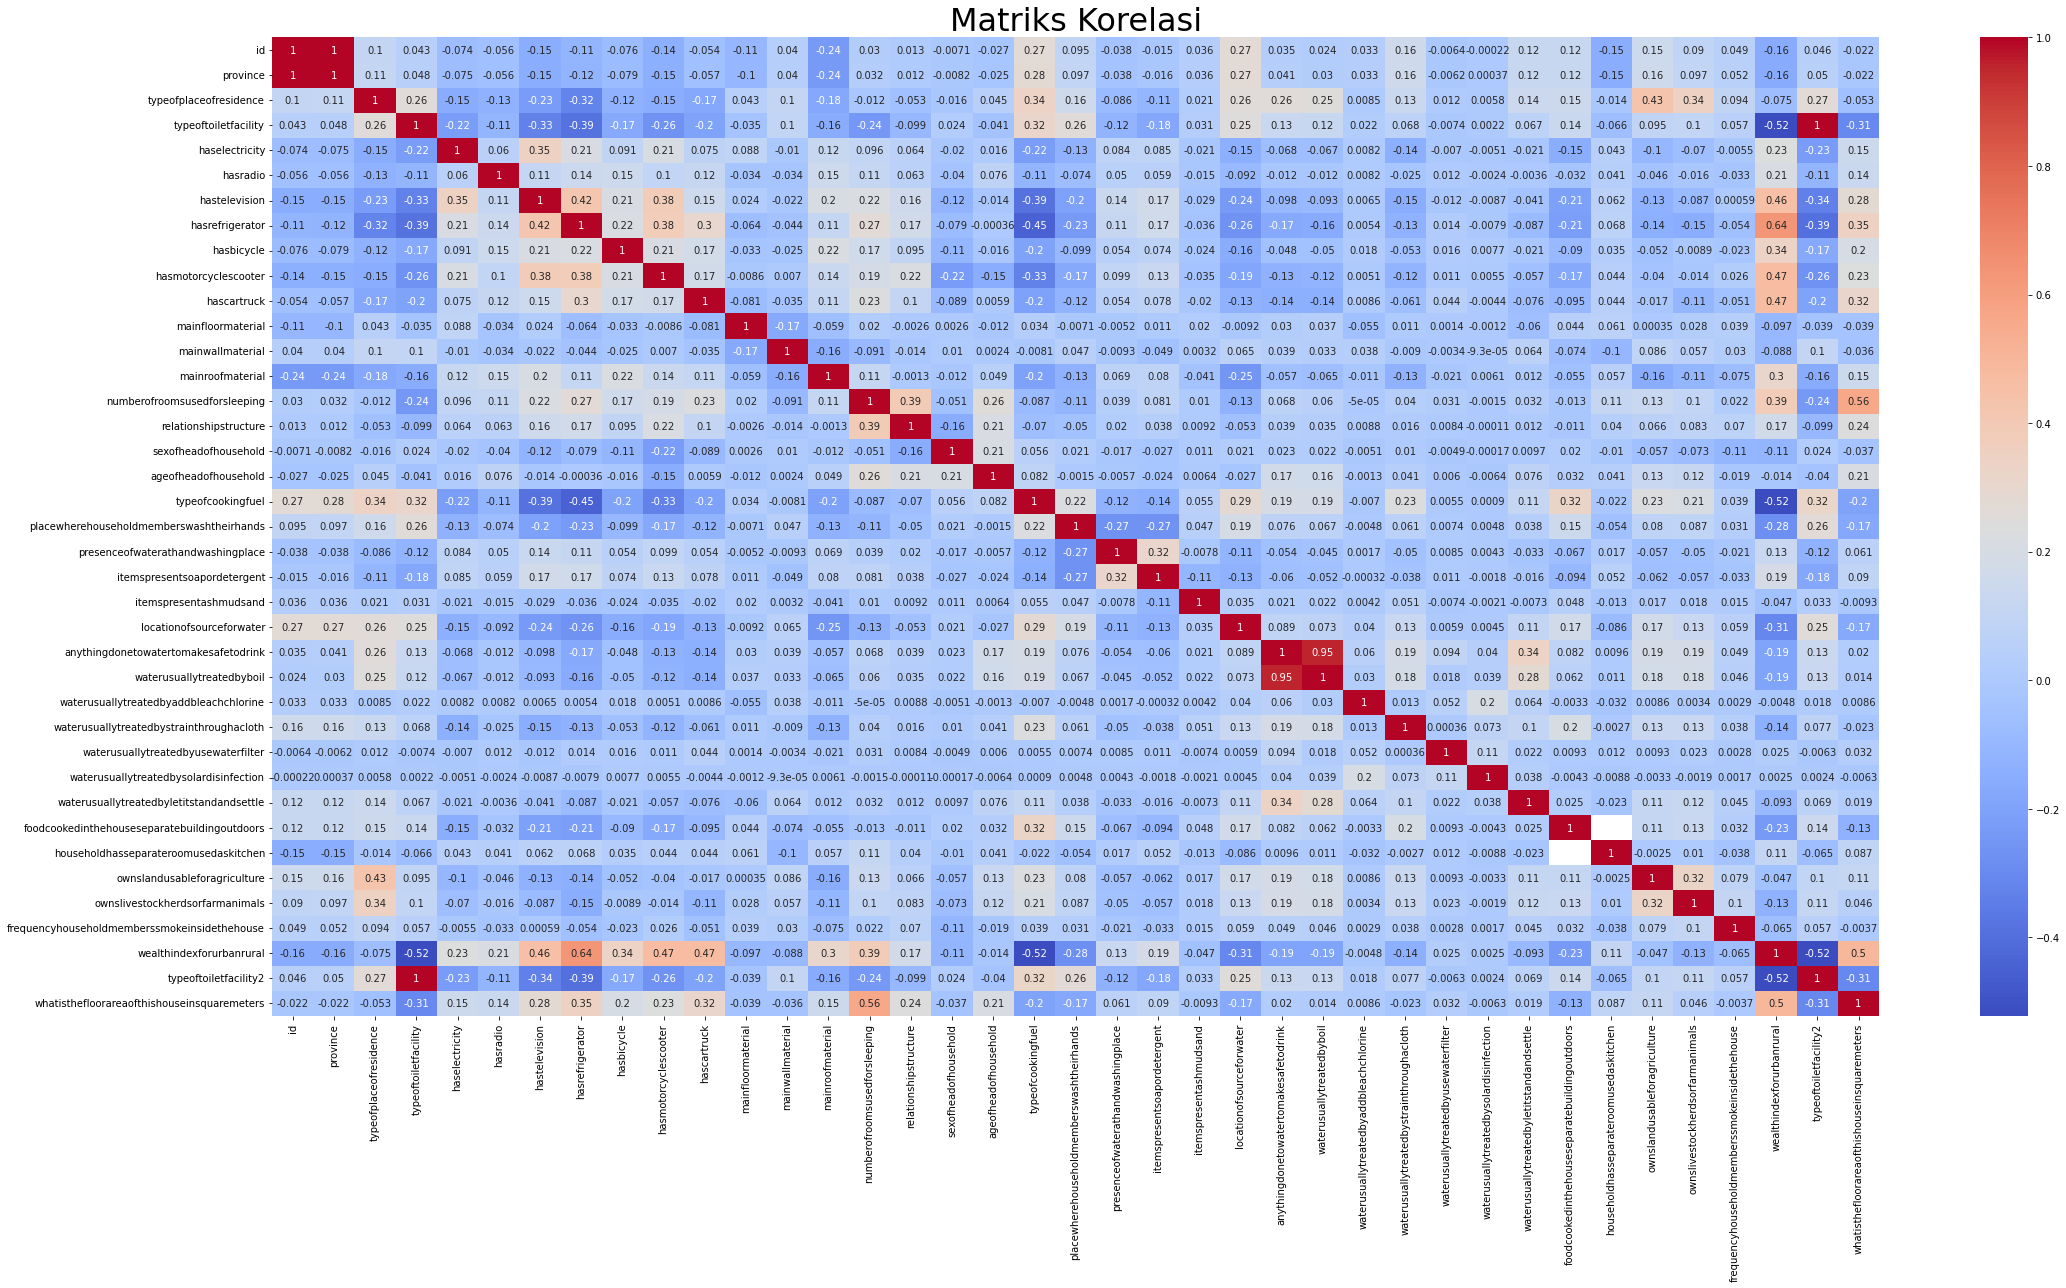

In [12]:
# Analisis Korelasi
kor = df.corr(method="spearman")

plt.figure(figsize=(36,18))
sns.heatmap(kor, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi", fontsize=32)
plt.savefig("Matriks_korelasi_KualitasAir.jpg", bbox_inches='tight', dpi=800)

In [13]:
def plot_bar_and_box(param, figsize, xlabel=None, ylabel=None):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    df_plot = df[param].value_counts().reset_index(name="Jumlah")
    x='index'
    y="Jumlah"
    
    # Bar plot
    sns.barplot(data=df_plot, x=x, y=y, ax=ax[0], zorder=2)
    ax[0].bar_label(ax[0].containers[0])
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].grid(zorder=0)
    plt.xticks(rotation=0)
    ax[0].set_title("Bar Plot")
    
    # Box plot
    sns.boxplot(data=df[param], ax=ax[1], width=0.2)
    ax[1].set_xlabel(param.title())
    ax[1].set_title("Box-Plot")
    
    # Set title
    plt.suptitle(param.title(), y=1, fontweight="bold")
    plt.show()

col_nunique = df.nunique().reset_index()["index"].to_list()

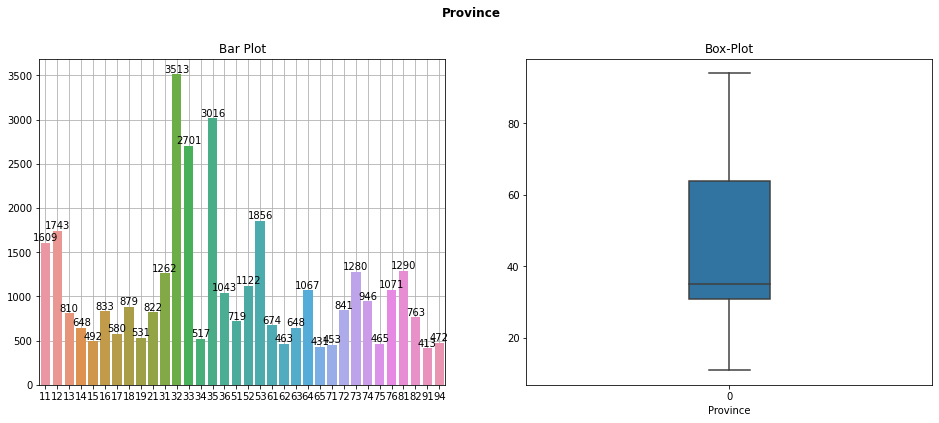



----------------------------------------------------------------------------------------------------------------------------


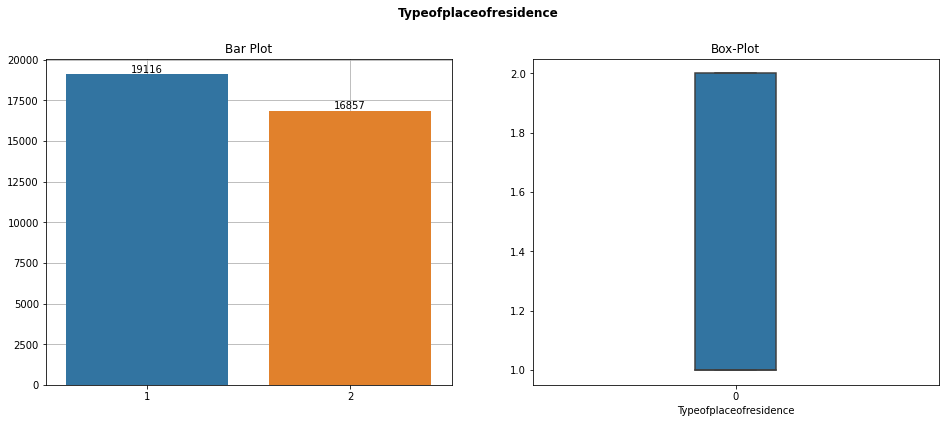



----------------------------------------------------------------------------------------------------------------------------


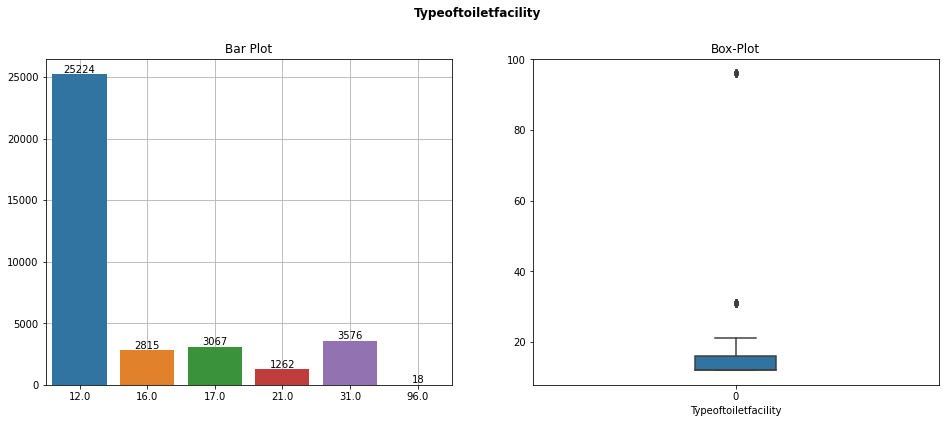



----------------------------------------------------------------------------------------------------------------------------


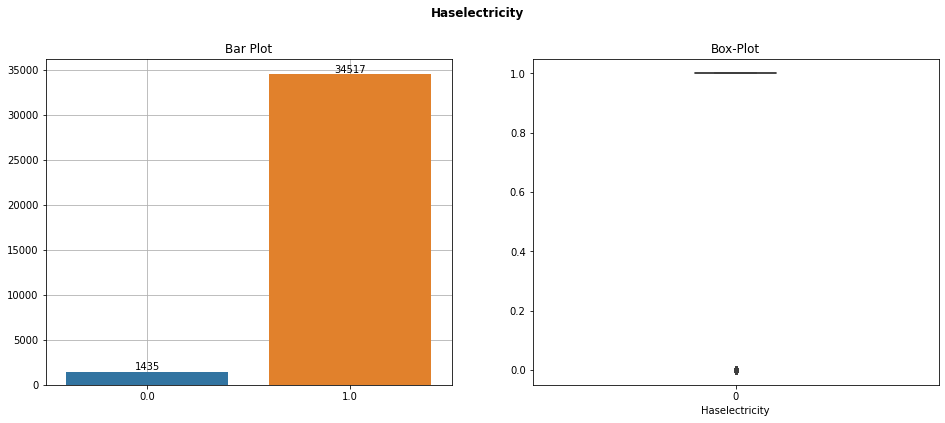



----------------------------------------------------------------------------------------------------------------------------


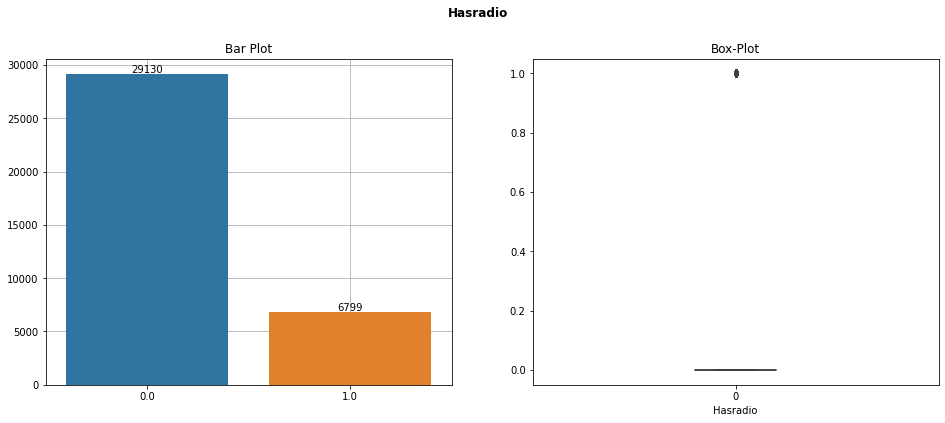



----------------------------------------------------------------------------------------------------------------------------


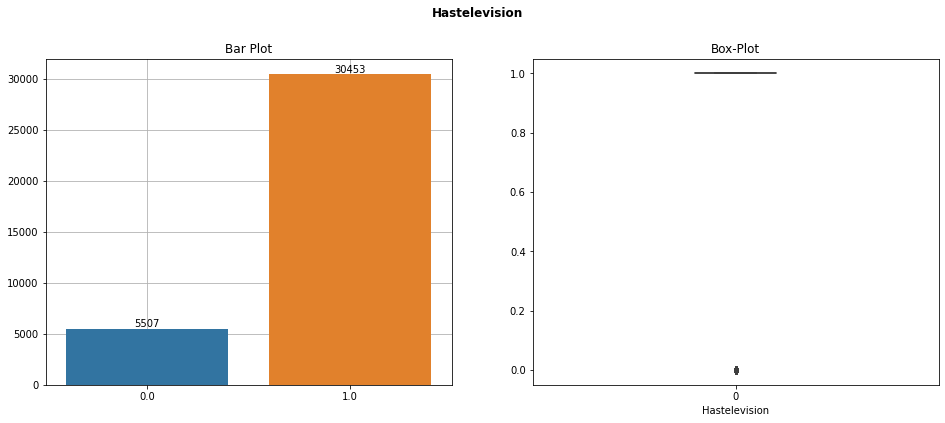



----------------------------------------------------------------------------------------------------------------------------


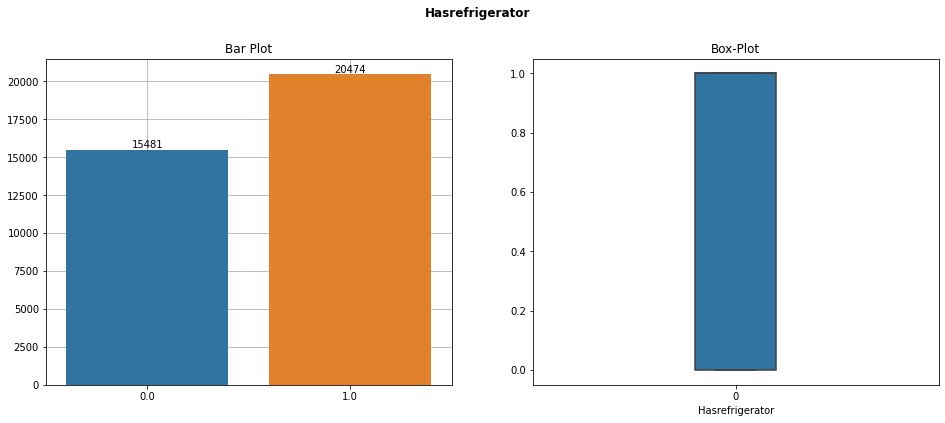



----------------------------------------------------------------------------------------------------------------------------


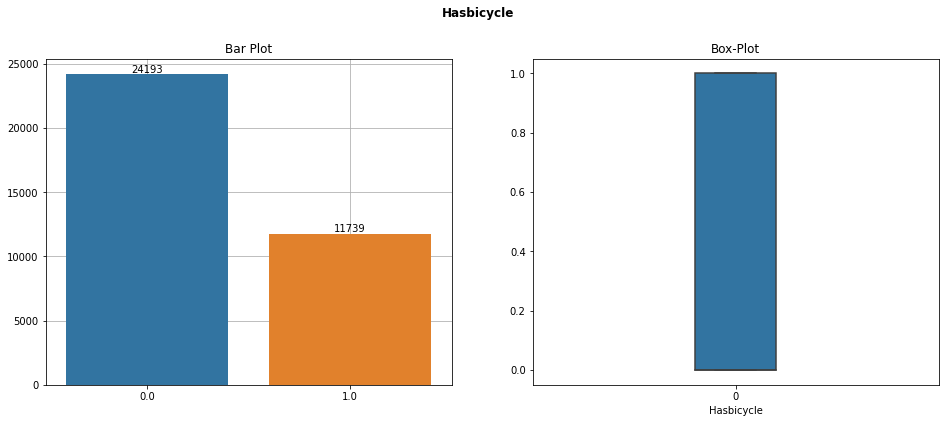



----------------------------------------------------------------------------------------------------------------------------


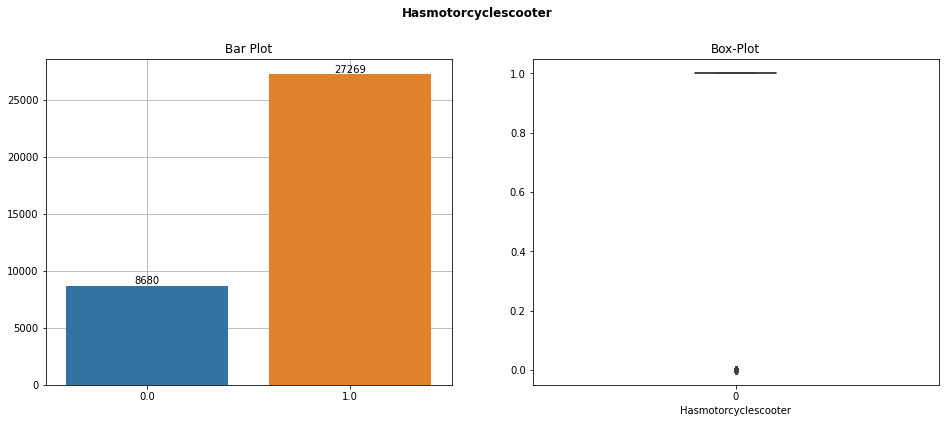



----------------------------------------------------------------------------------------------------------------------------


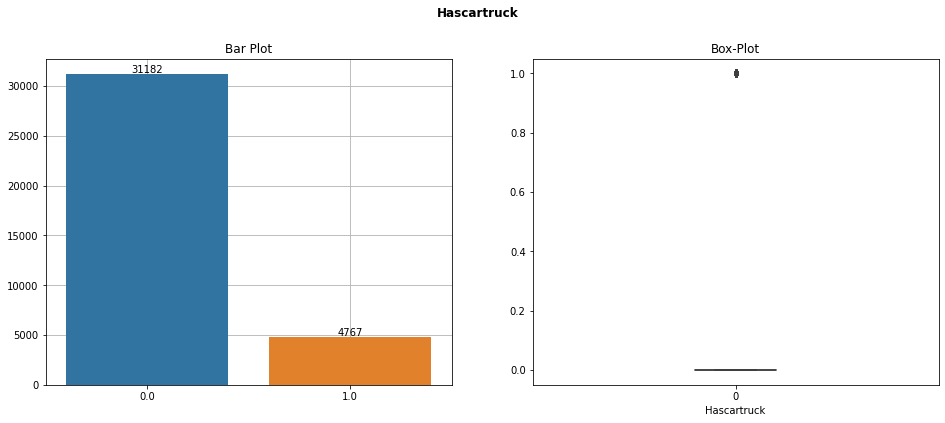



----------------------------------------------------------------------------------------------------------------------------


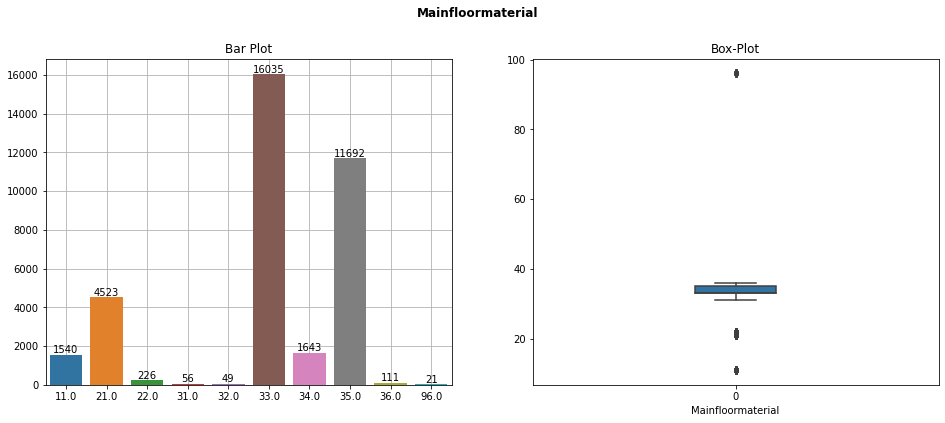



----------------------------------------------------------------------------------------------------------------------------


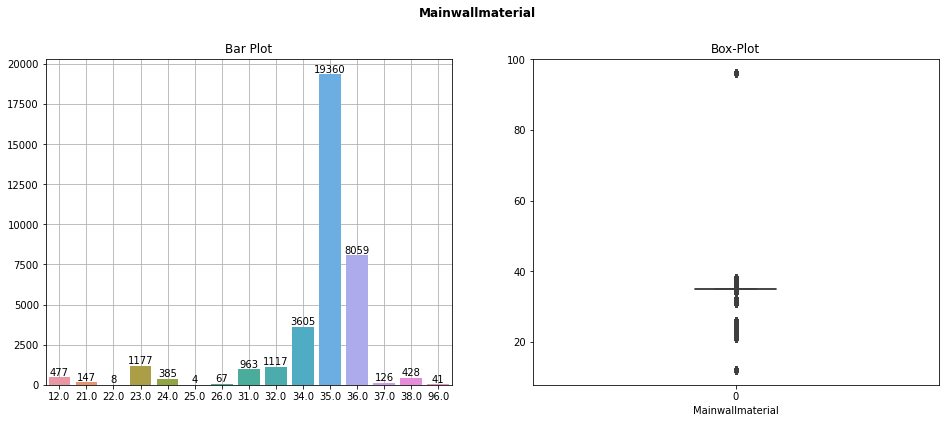



----------------------------------------------------------------------------------------------------------------------------


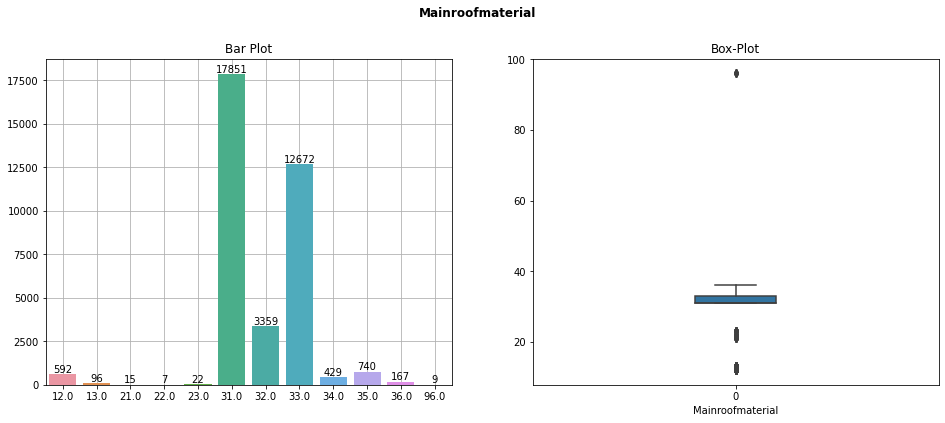



----------------------------------------------------------------------------------------------------------------------------


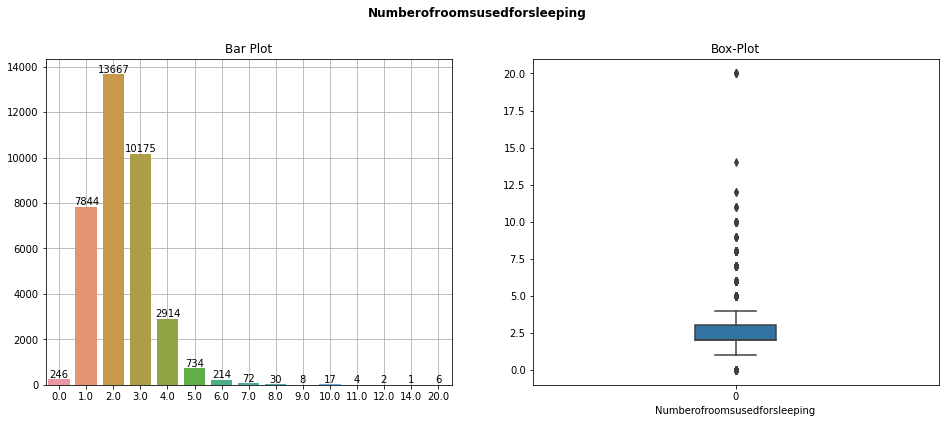



----------------------------------------------------------------------------------------------------------------------------


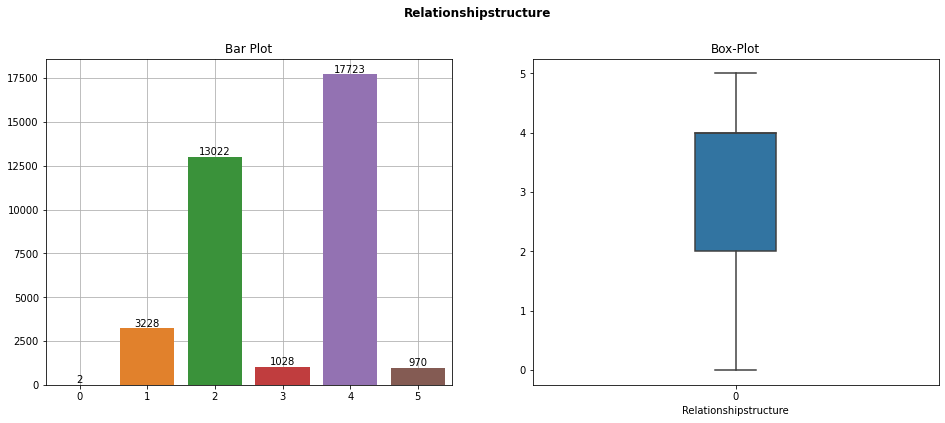



----------------------------------------------------------------------------------------------------------------------------


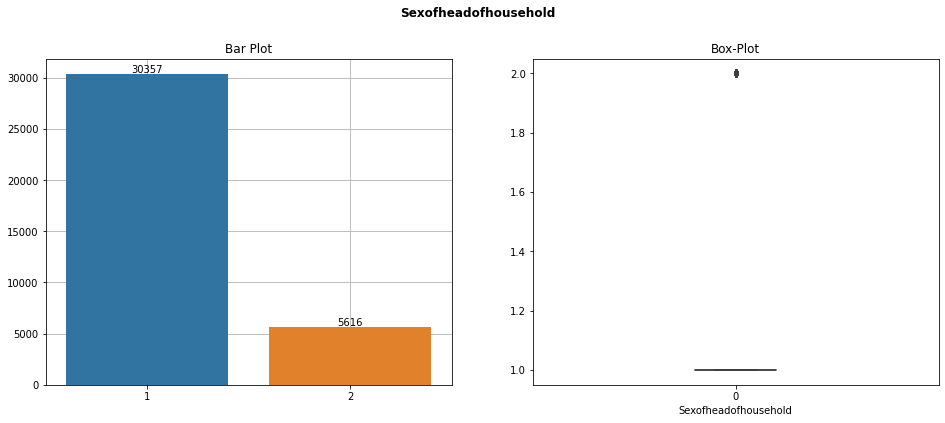



----------------------------------------------------------------------------------------------------------------------------


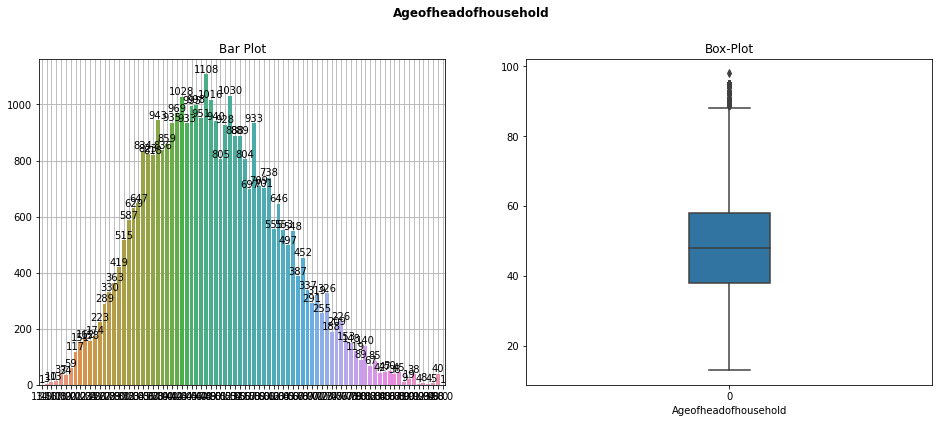



----------------------------------------------------------------------------------------------------------------------------


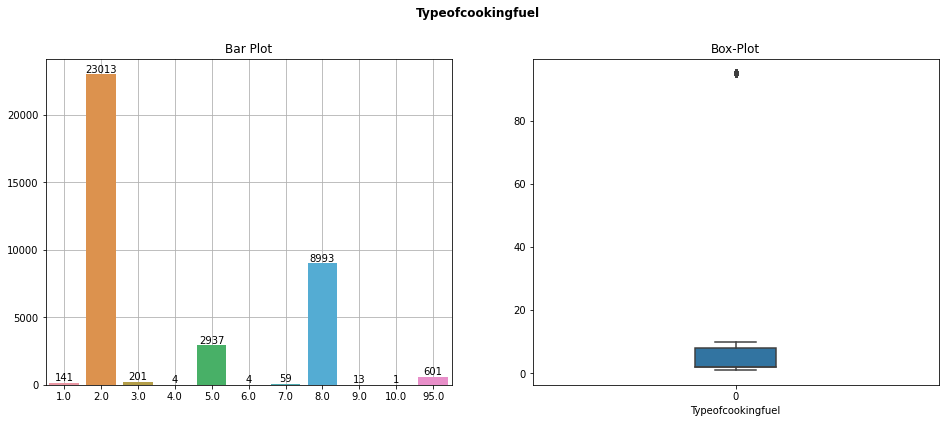



----------------------------------------------------------------------------------------------------------------------------


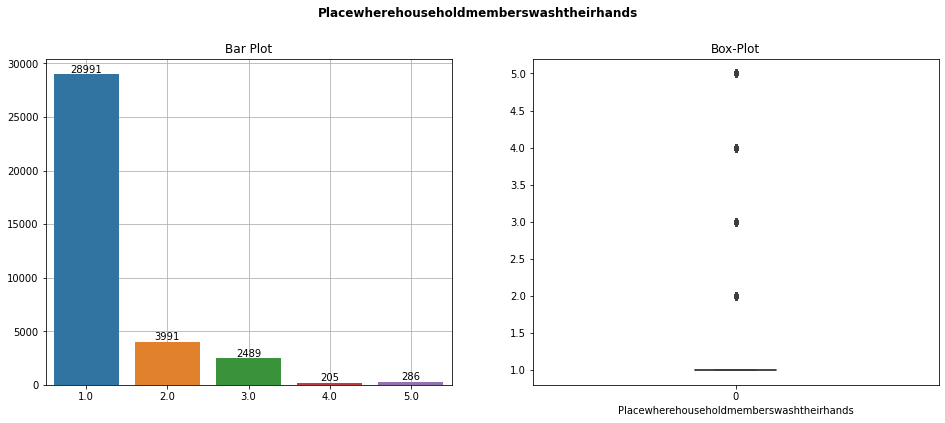



----------------------------------------------------------------------------------------------------------------------------


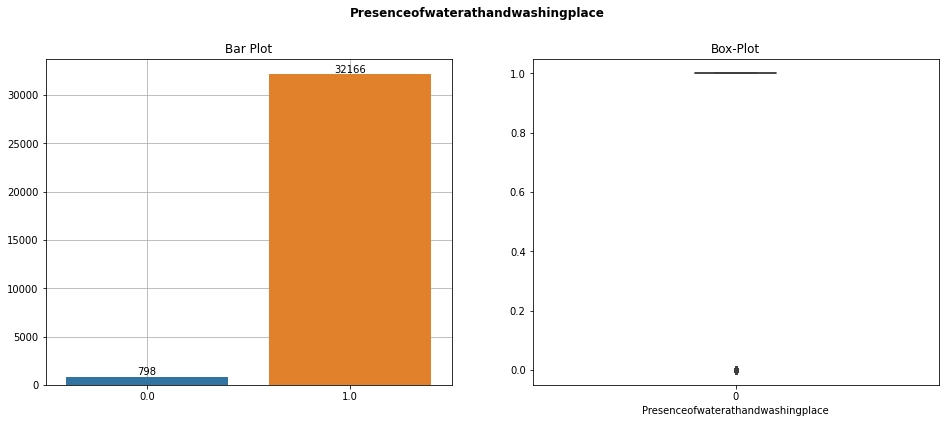



----------------------------------------------------------------------------------------------------------------------------


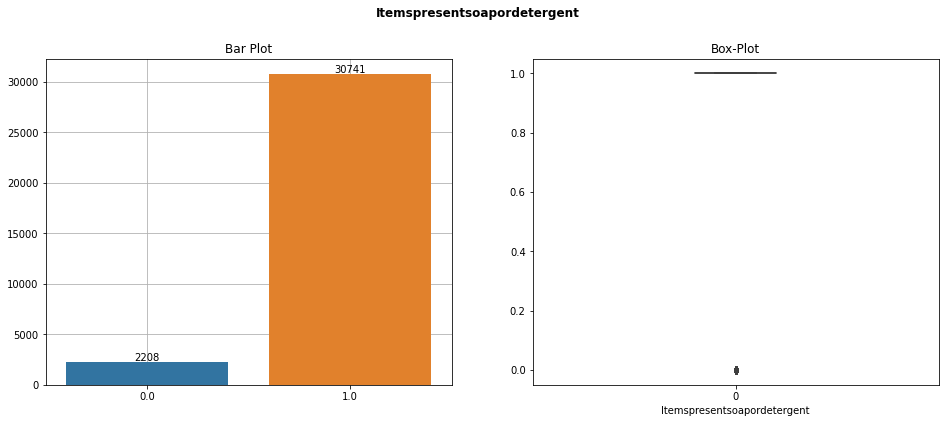



----------------------------------------------------------------------------------------------------------------------------


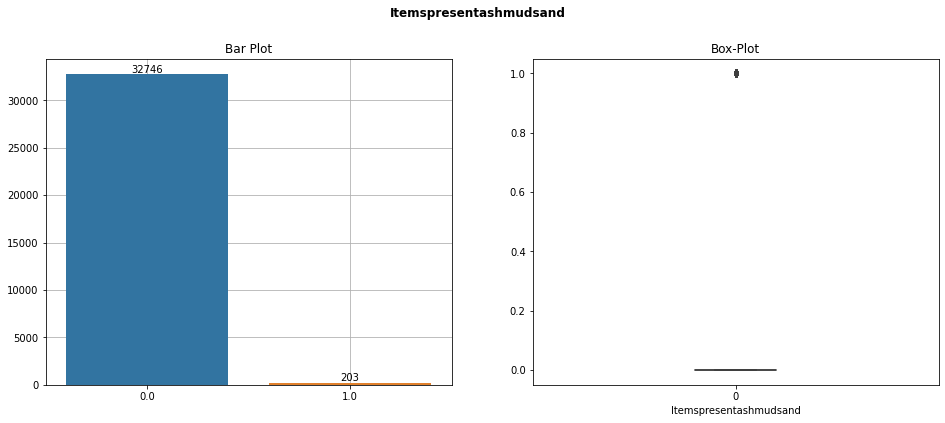



----------------------------------------------------------------------------------------------------------------------------


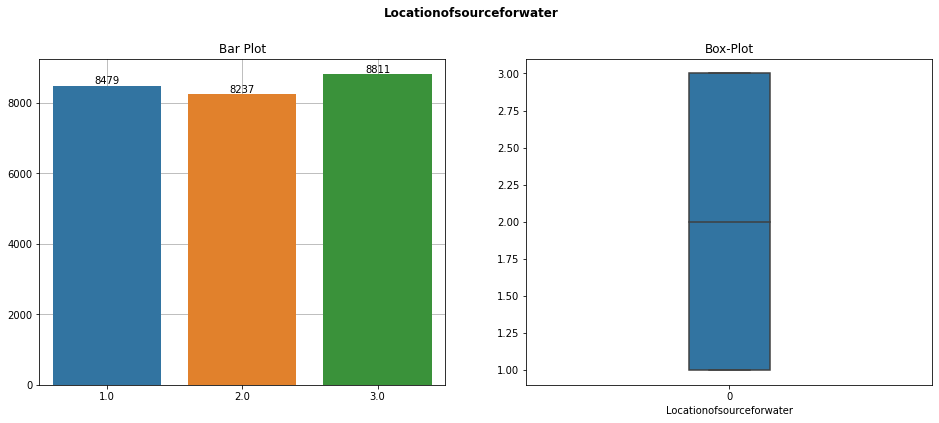



----------------------------------------------------------------------------------------------------------------------------


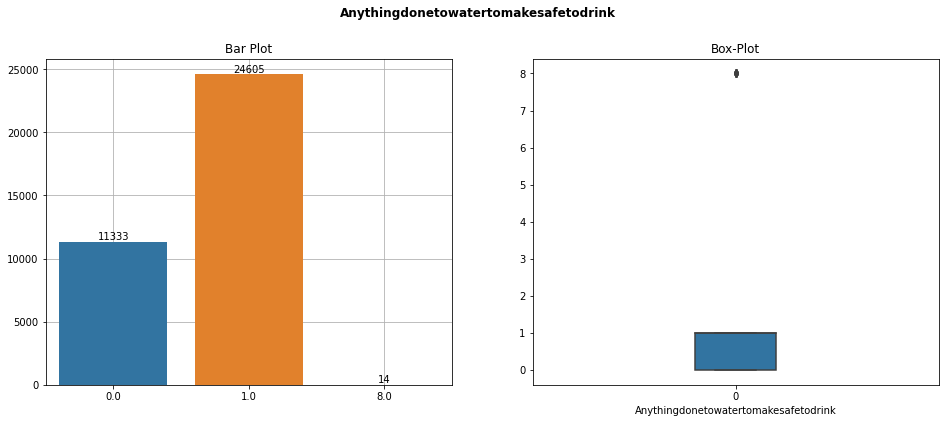



----------------------------------------------------------------------------------------------------------------------------


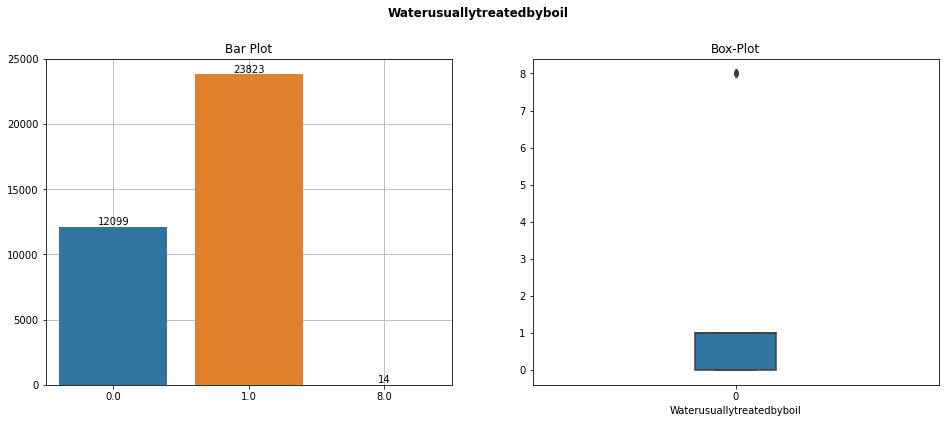



----------------------------------------------------------------------------------------------------------------------------


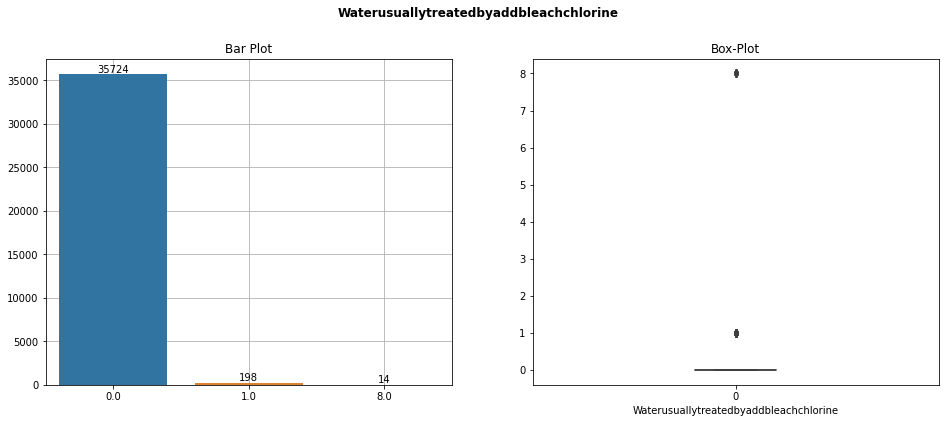



----------------------------------------------------------------------------------------------------------------------------


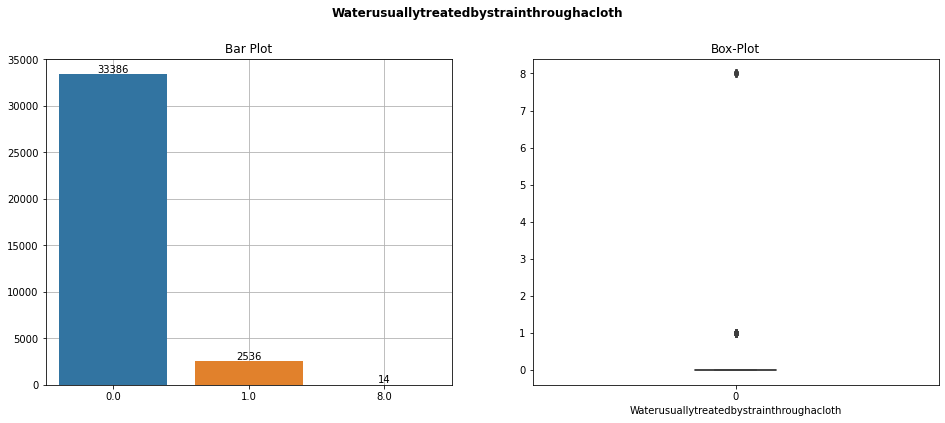



----------------------------------------------------------------------------------------------------------------------------


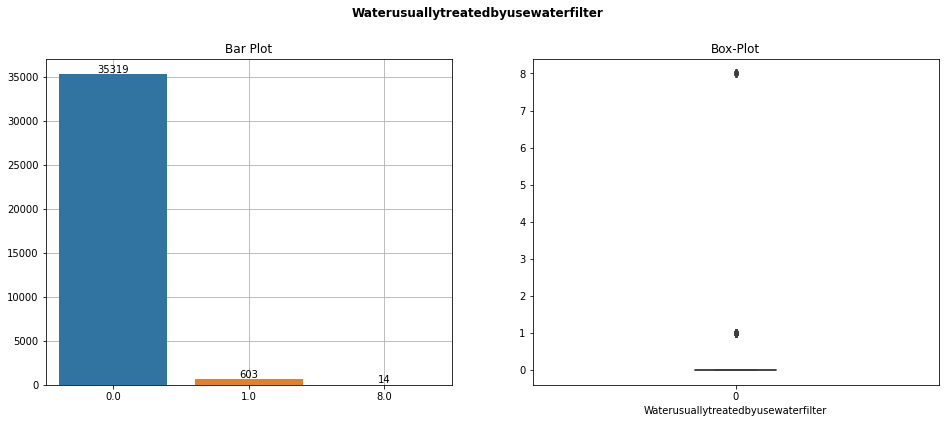



----------------------------------------------------------------------------------------------------------------------------


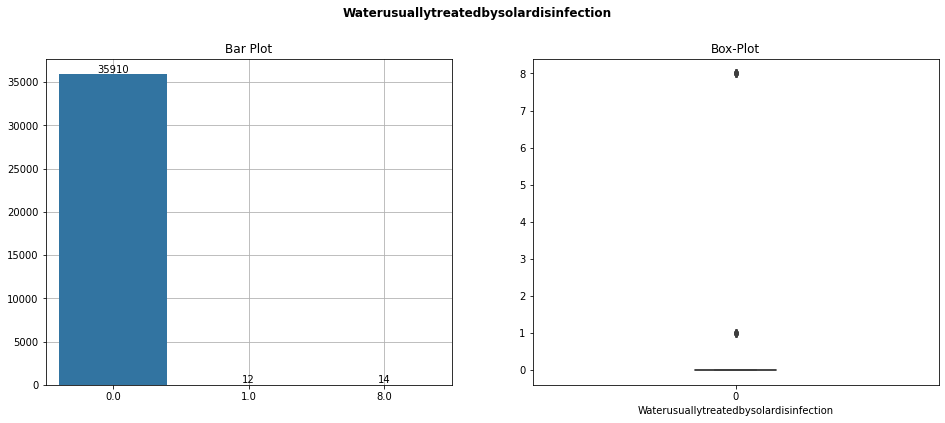



----------------------------------------------------------------------------------------------------------------------------


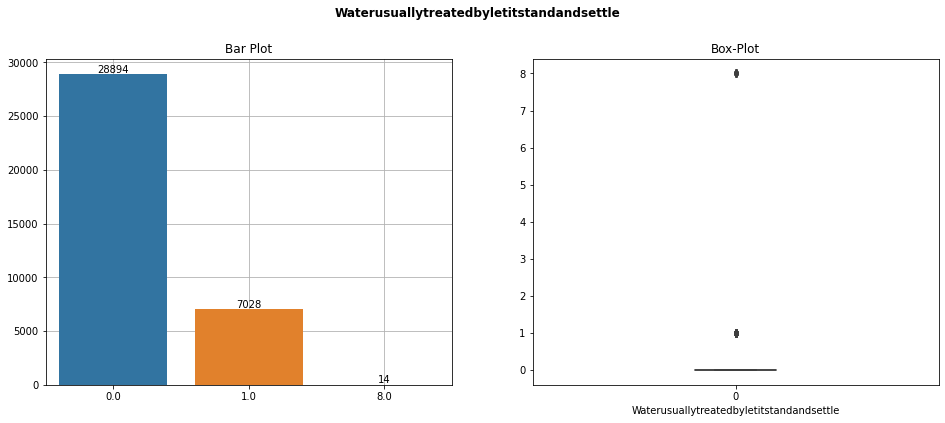



----------------------------------------------------------------------------------------------------------------------------


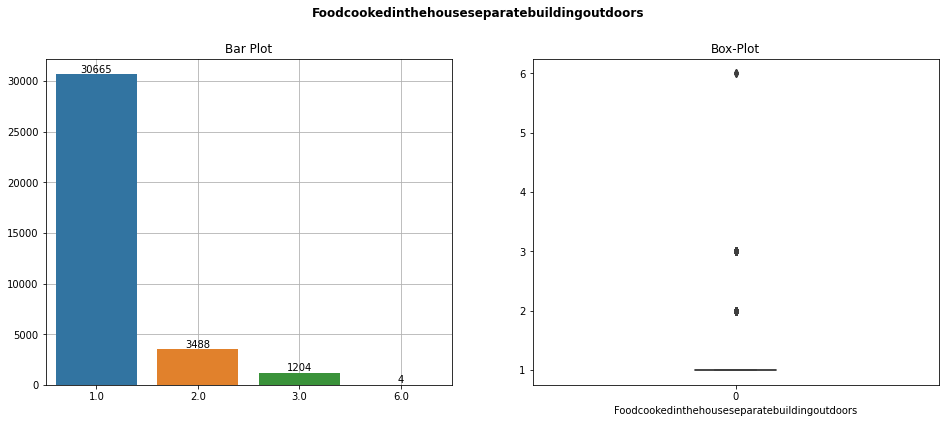



----------------------------------------------------------------------------------------------------------------------------


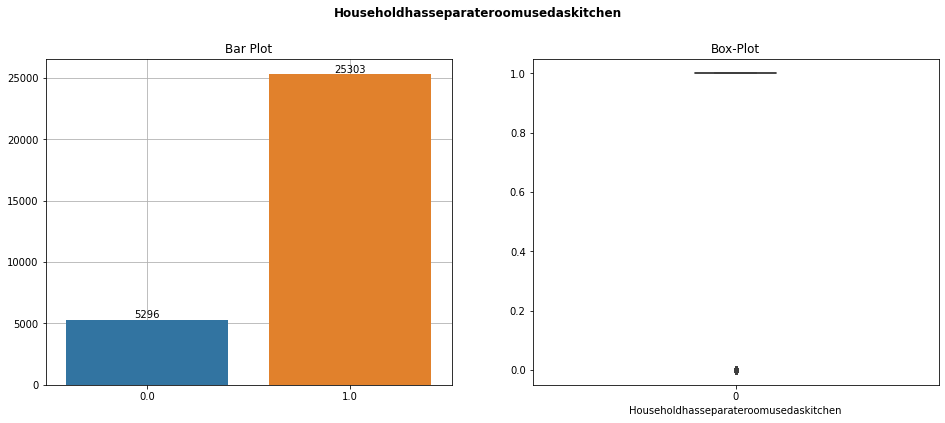



----------------------------------------------------------------------------------------------------------------------------


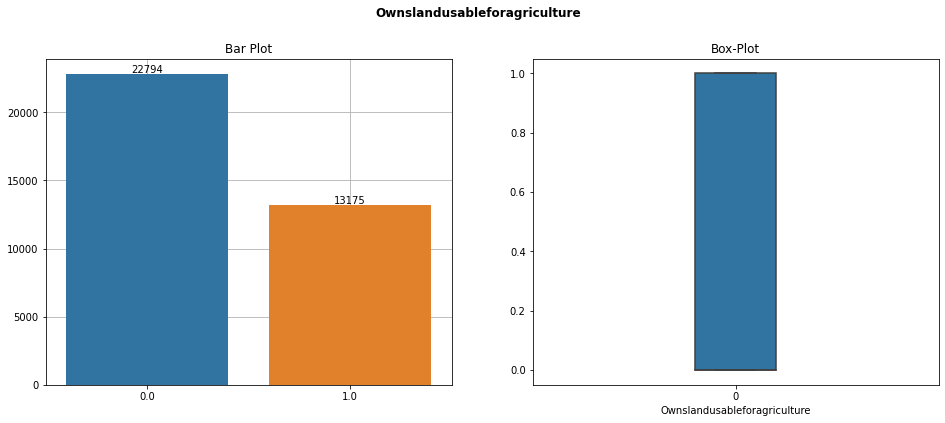



----------------------------------------------------------------------------------------------------------------------------


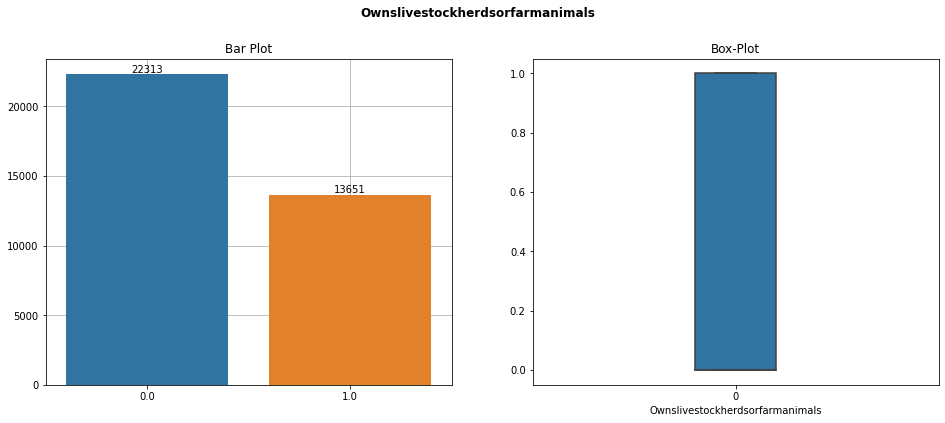



----------------------------------------------------------------------------------------------------------------------------


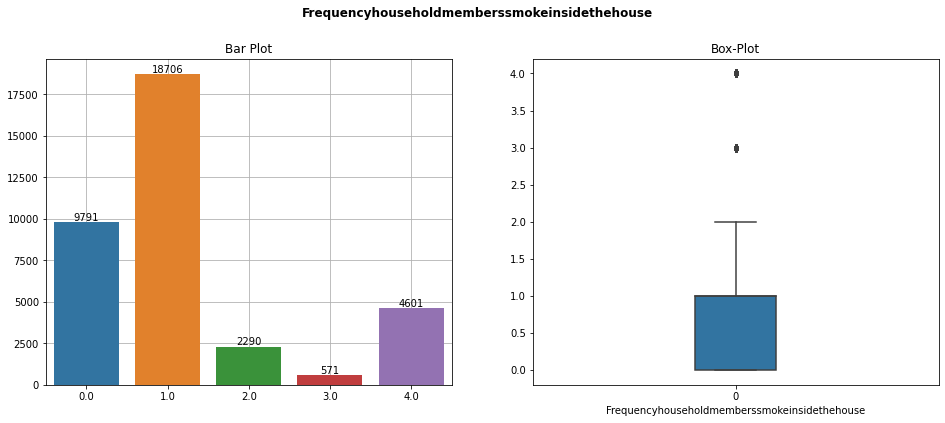



----------------------------------------------------------------------------------------------------------------------------


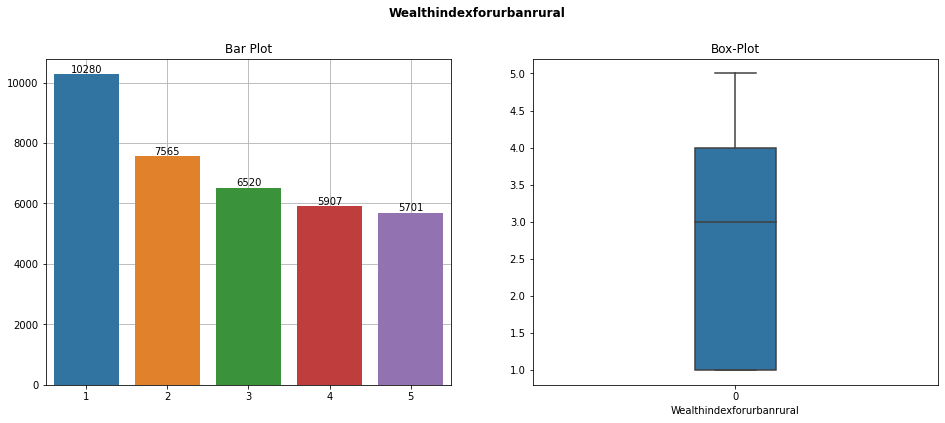



----------------------------------------------------------------------------------------------------------------------------


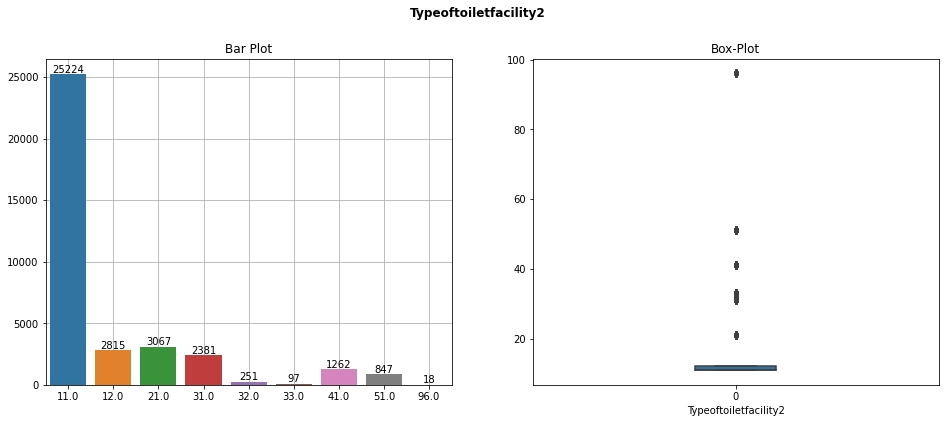



----------------------------------------------------------------------------------------------------------------------------


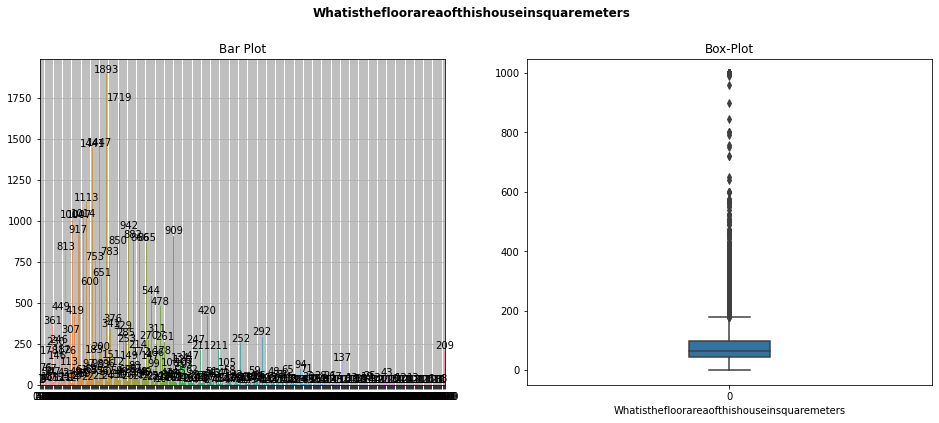



----------------------------------------------------------------------------------------------------------------------------


ValueError: could not convert string to float: 'Layak Minum'

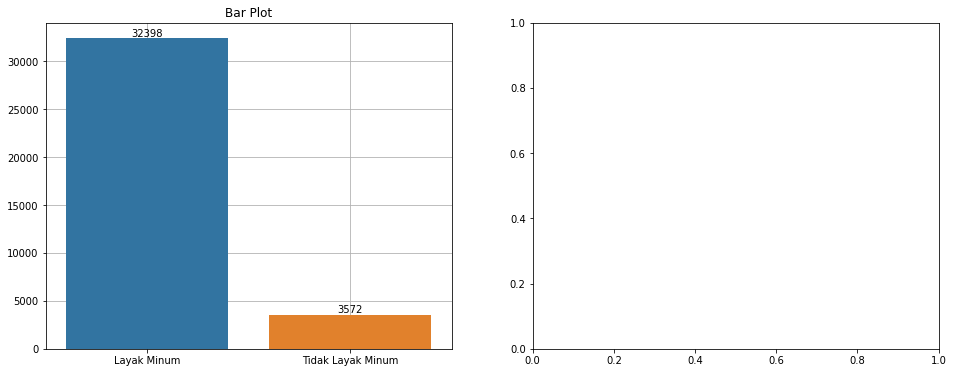

In [14]:
for i in range(1, len(col_nunique)) :
    plot_bar_and_box(col_nunique[i], (16,6))
    print("\n")
    print("----------------------------------------------------------------------------------------------------------------------------")

In [15]:
# Terlihat kolom what is the floor are of this house dimana satu-satunya kolom numerik yang memiliki ekstrem outlier
df_outlier = df.skew().reset_index()
df_outlier["n_unique"] = df.nunique().reset_index()[0]
df_outlier.columns = ["Kolom", "Nilai_Skewness", "Jumlah_Keunikan"]
df_bound_skew = df_outlier[(df_outlier["Nilai_Skewness"] > 1) | (df_outlier["Nilai_Skewness"] < -1)]
df_bound_skew_new = df_bound_skew[df_bound_skew["Jumlah_Keunikan"] > 2]
df_bound_skew_new

C:\Users\Made Raditya\AppData\Local\Temp\ipykernel_4696\3260360027.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_outlier = df.skew().reset_index()


,Kolom,Nilai_Skewness,Jumlah_Keunikan
3,typeoftoiletfacility,2.983093,6
11,mainfloormaterial,-1.228234,10
13,mainroofmaterial,-2.413648,12
14,numberofroomsusedforsleeping,1.688295,15
18,typeofcookingfuel,7.012492,11
19,placewherehouseholdmemberswashtheirhands,2.649249,5
26,waterusuallytreatedbyaddbleachchlorine,38.584541,3
27,waterusuallytreatedbystrainthroughacloth,9.238115,3
28,waterusuallytreatedbyusewaterfilter,25.454932,3
29,waterusuallytreatedbysolardisinfection,49.718382,3


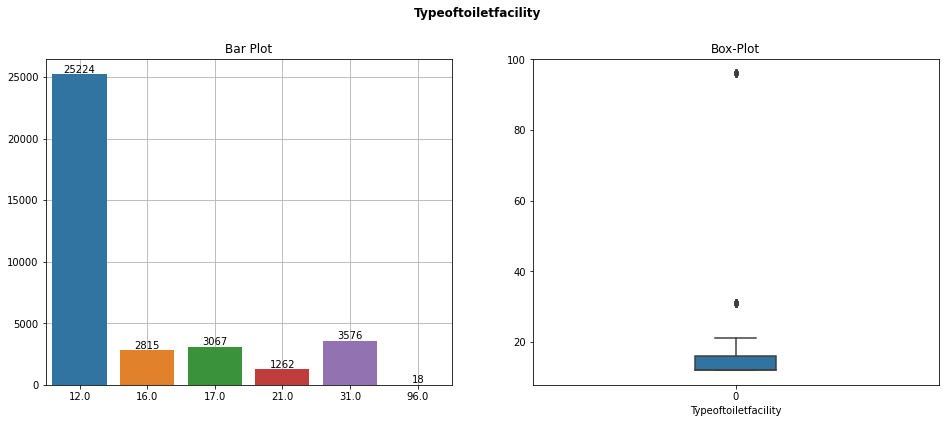



----------------------------------------------------------------------------------------------------------------------------


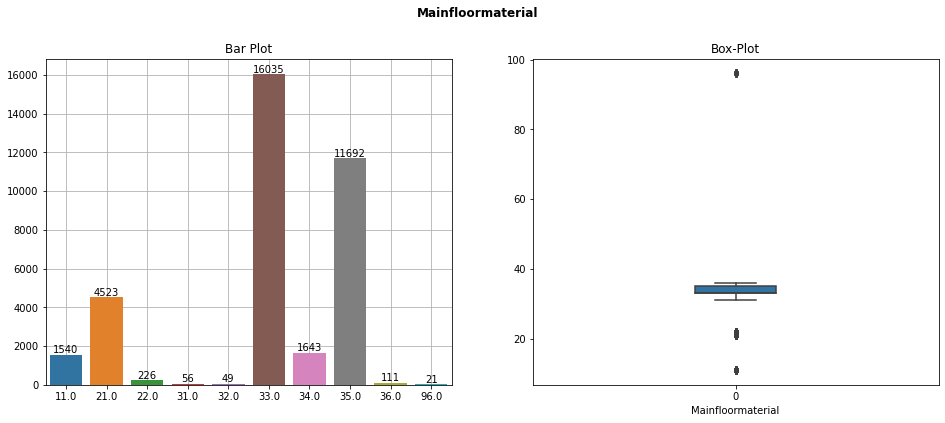



----------------------------------------------------------------------------------------------------------------------------


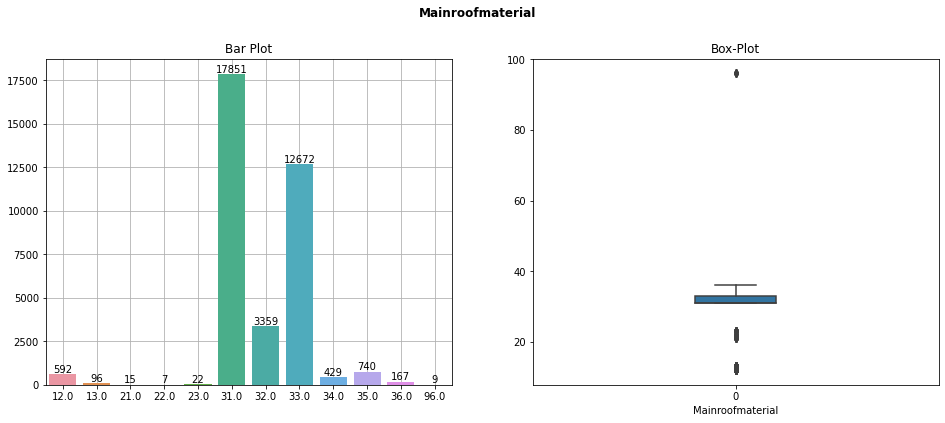



----------------------------------------------------------------------------------------------------------------------------


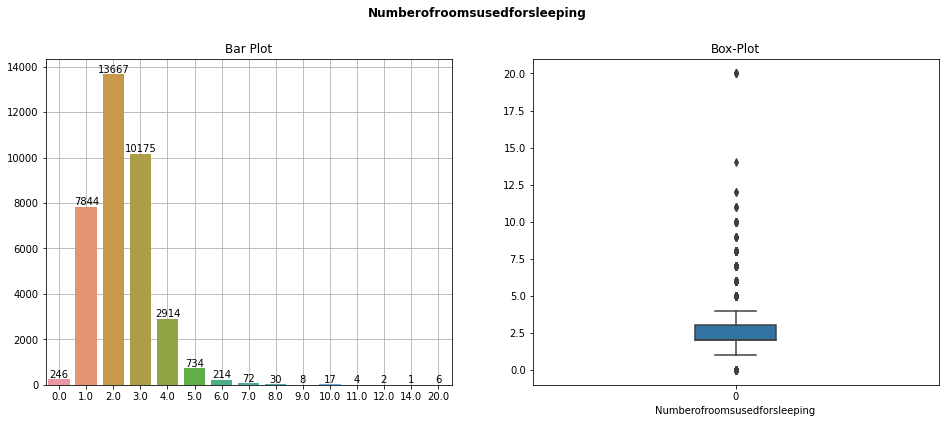



----------------------------------------------------------------------------------------------------------------------------


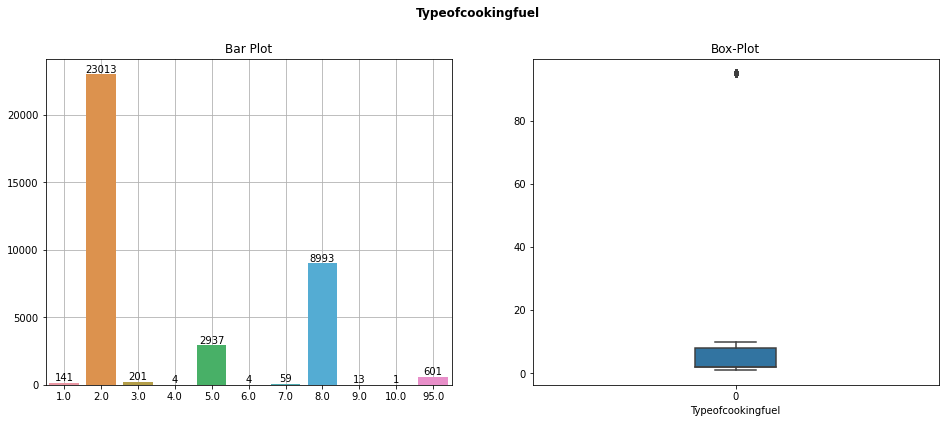



----------------------------------------------------------------------------------------------------------------------------


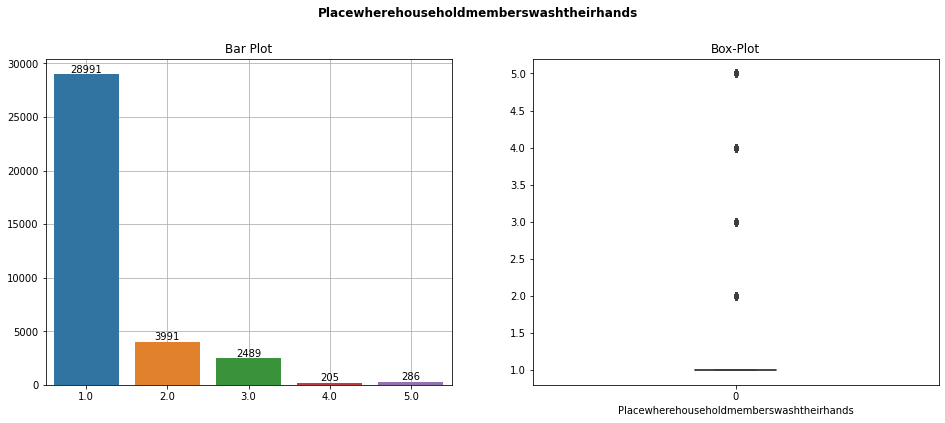



----------------------------------------------------------------------------------------------------------------------------


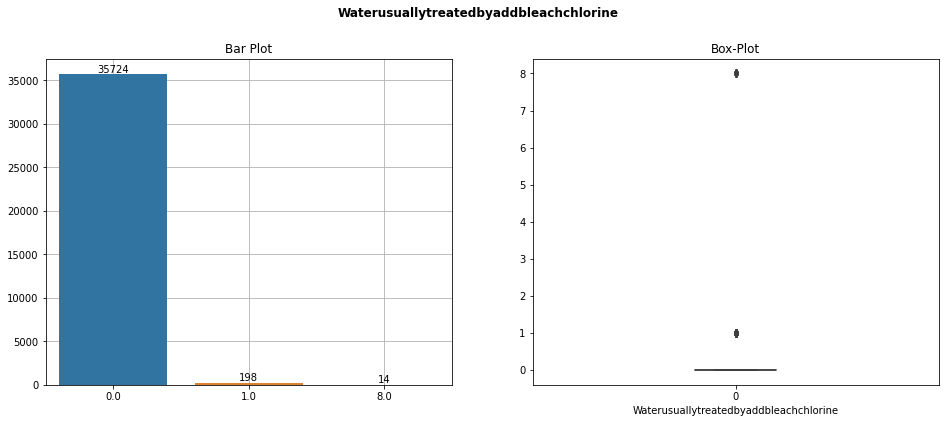



----------------------------------------------------------------------------------------------------------------------------


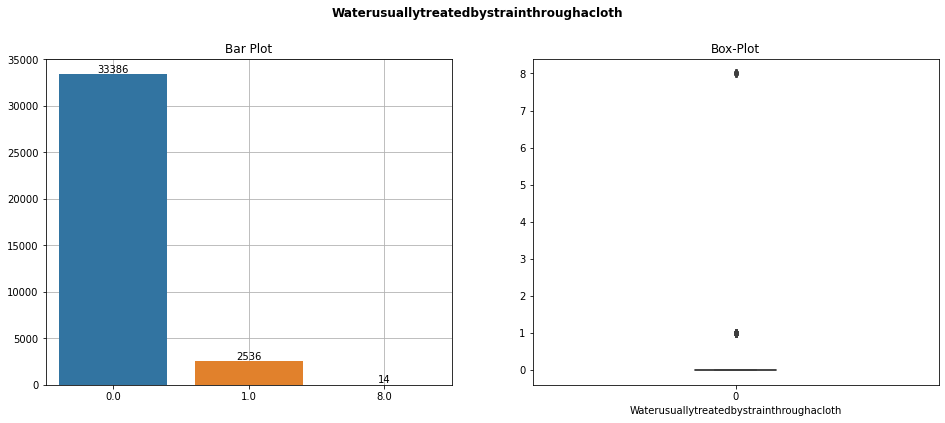



----------------------------------------------------------------------------------------------------------------------------


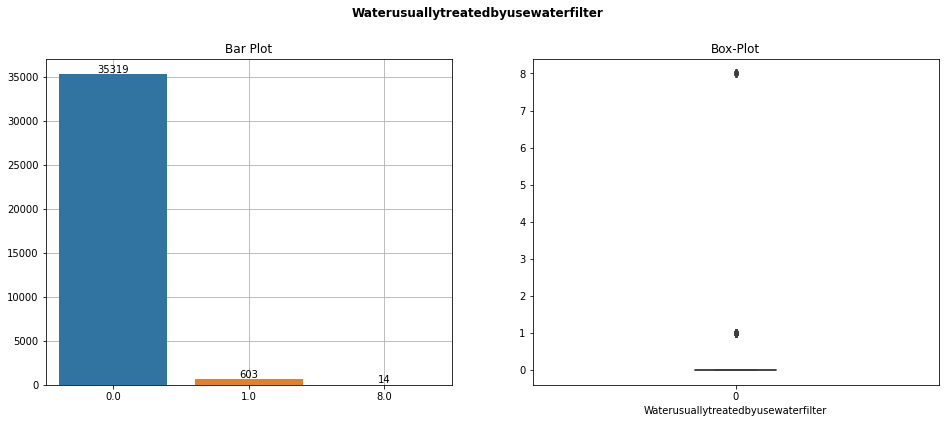



----------------------------------------------------------------------------------------------------------------------------


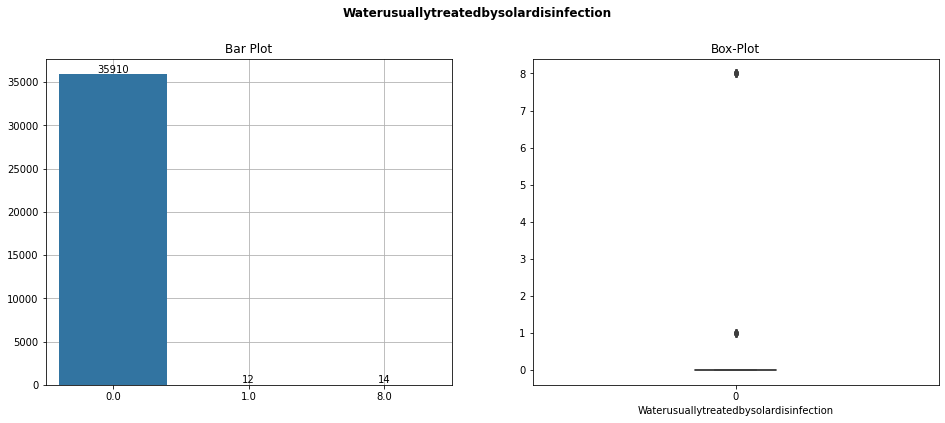



----------------------------------------------------------------------------------------------------------------------------


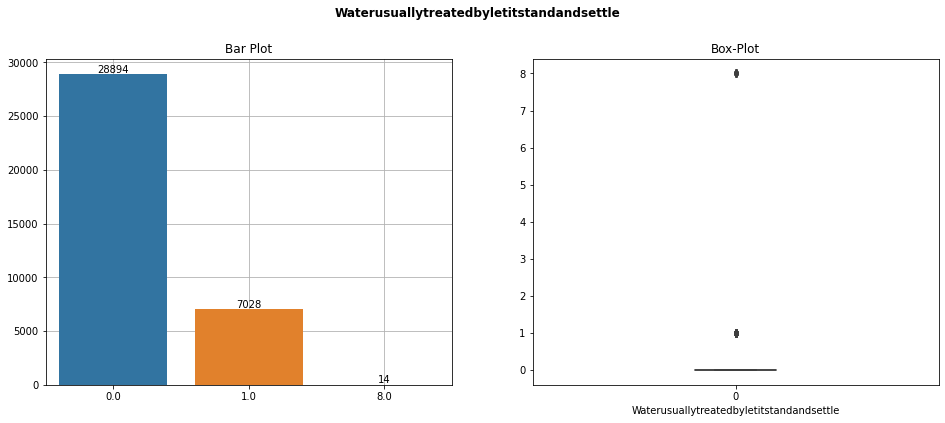



----------------------------------------------------------------------------------------------------------------------------


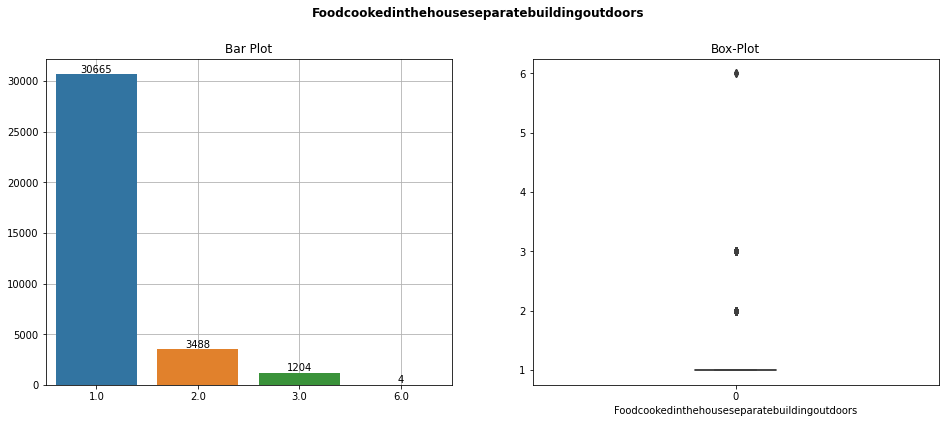



----------------------------------------------------------------------------------------------------------------------------


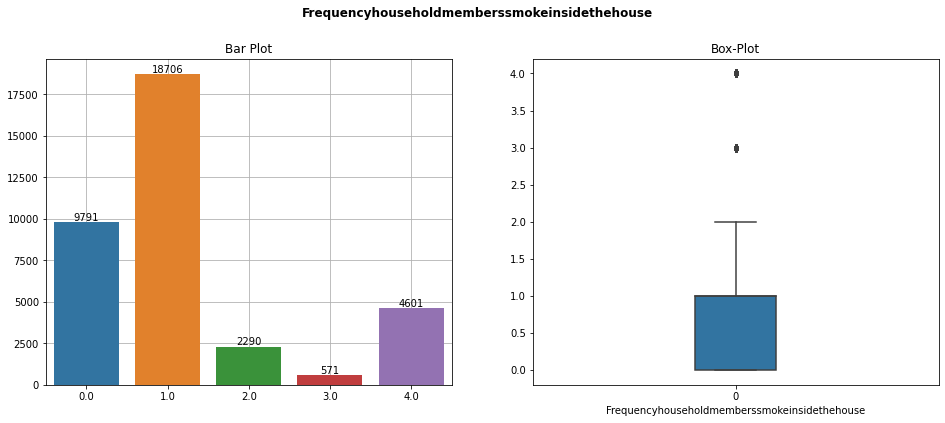



----------------------------------------------------------------------------------------------------------------------------


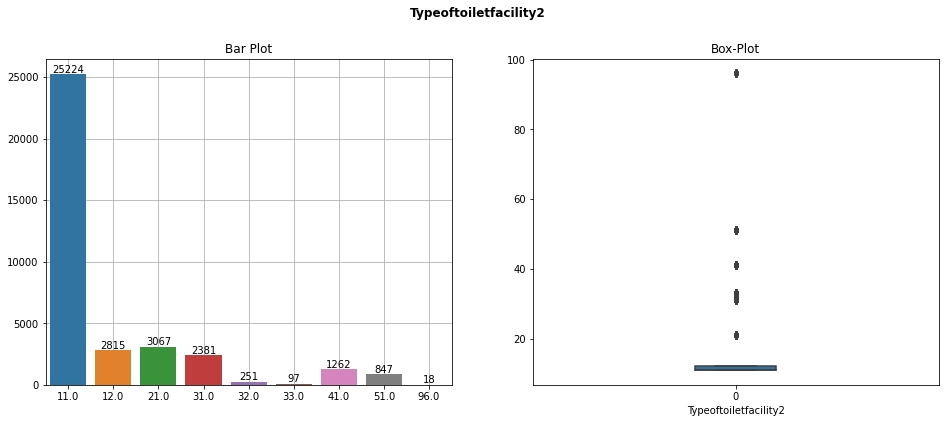



----------------------------------------------------------------------------------------------------------------------------


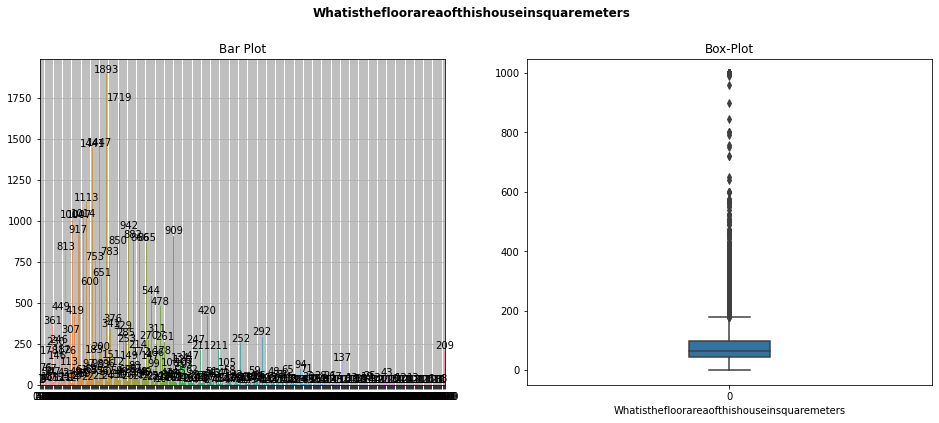



----------------------------------------------------------------------------------------------------------------------------


In [16]:
for i in range(0, len(df_bound_skew_new)) :
    plot_bar_and_box(df_bound_skew_new["Kolom"].iloc[i], (16,6))
    print("\n")
    print("----------------------------------------------------------------------------------------------------------------------------")

# Preprocessing Data

In [12]:
# Terdapat data noise yang akan menggangu prediksi dari model. Sehingga perlu didrop beberapa index yang dirasa sebagai data yang noise
# Data noise dapat diartikan sebagai data yang menggangu pemilihan label untuk Kolom Water Feasibility Category oleh model karena dinilai secara realistis tak menggambarkan kondisi dunia sebenarnya

df = df.drop(index=[34468,34900,9808,20436,13838,
                    13844,13859,13863,13865,12380,
                    12365,12282,18620,18481,18739,
                    35550,6642])

In [13]:
# Karena pada kolom kategori memiliki 3 baris yang mengandung missing value maka akan dihilangkan agar tidak membuat model bingung
df.dropna(subset=['waterfeasibilitycategory'], inplace=True)

In [14]:
# Mengganti NaN values pada kolom yang memiliki missing value
# Kolom yang berupa category akan diganti dengan modus nya
# Kolom yang berupa numerik akan diganti dengan mediannya
col_nan = df.columns[df.isna().any()].tolist()

for i in col_nan :
    if i in ["ageofheadofhousehold", "whatisthefloorareaofthishouseinsquaremeters"] :
        df[i].fillna(st.median(df[i]), inplace=True)
    else :
        df[i].fillna(st.mode(df[i]), inplace=True)

In [15]:
# Mengecek kembali apakah masih terdapat missing value
df.isnull().sum()

id                                              0
province                                        0
typeofplaceofresidence                          0
typeoftoiletfacility                            0
haselectricity                                  0
hasradio                                        0
hastelevision                                   0
hasrefrigerator                                 0
hasbicycle                                      0
hasmotorcyclescooter                            0
hascartruck                                     0
mainfloormaterial                               0
mainwallmaterial                                0
mainroofmaterial                                0
numberofroomsusedforsleeping                    0
relationshipstructure                           0
sexofheadofhousehold                            0
ageofheadofhousehold                            0
typeofcookingfuel                               0
placewherehouseholdmemberswashtheirhands        0


In [16]:
# Mengganti kategori layak minum menjadi 1, tidak layak minum menjadi 0
# Kemudian buang kolom water feasibility category, karena tidak akan digunakan
df["Kategori"] = df["waterfeasibilitycategory"].map({"Layak Minum" : 1, "Tidak Layak Minum" : 0})
df.drop(['waterfeasibilitycategory'], axis = 1, inplace = True)

## Handle Outlier

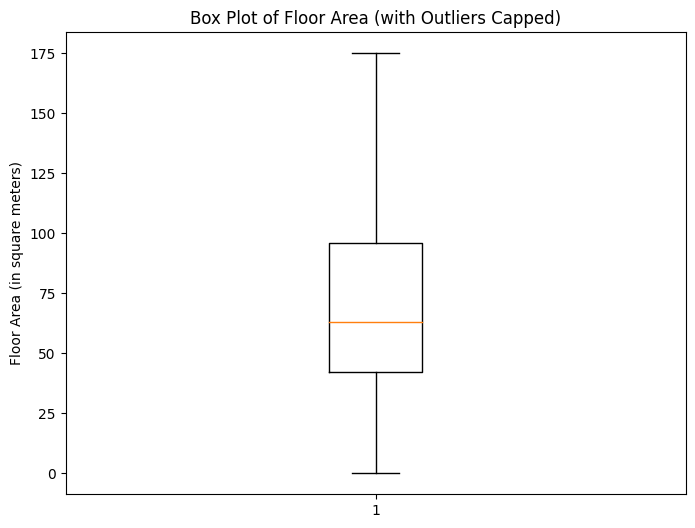

In [17]:
# Handle Outlier
# Mengganti nilai yang lebih besar dari 200 dengan 200
threshold = 175

# Cap outliers above the threshold
df['whatisthefloorareaofthishouseinsquaremeters'] = np.where(
    df['whatisthefloorareaofthishouseinsquaremeters'] > threshold,
    threshold,
    df['whatisthefloorareaofthishouseinsquaremeters']
)

# Plot the box plot after handling outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['whatisthefloorareaofthishouseinsquaremeters'])
plt.ylabel('Floor Area (in square meters)')
plt.title('Box Plot of Floor Area (with Outliers Capped)')
plt.show()

# Data Splitting

In [18]:
# Membuat variabel x untuk semua kolom selain kategori, dan y untuk kolom kategori
# Stratify diatur ke y agar membagi dataset sama banyak
X = df.drop(["Kategori"],axis=1)
y = df["Kategori"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.05,
                                                    random_state=2023,
                                                    stratify=y,
                                                    shuffle=True)

In [19]:
# Membuat fungsi untuk melihat apakah persebaran data sudah merata
def plot_data(dataframe, title) :
    df_plot = dataframe.value_counts().reset_index()

    plt.figure(figsize=(6, 6))
    plt.pie(df_plot['Kategori'], labels=df_plot['index'], startangle=90, autopct='%1.0f%%', 
            textprops=dict(size=16), explode=(0,0.05))
    plt.title(title, fontweight="bold", fontsize=16)
    plt.show()

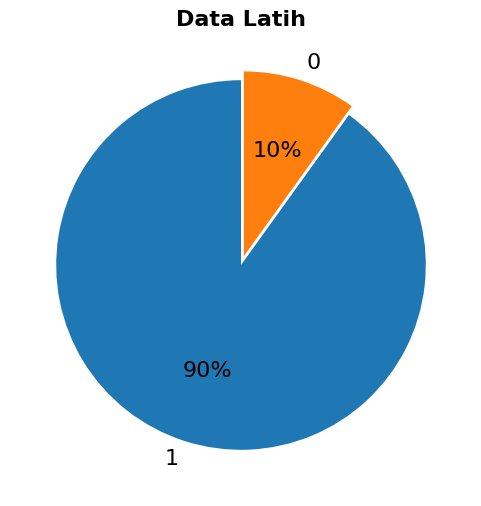

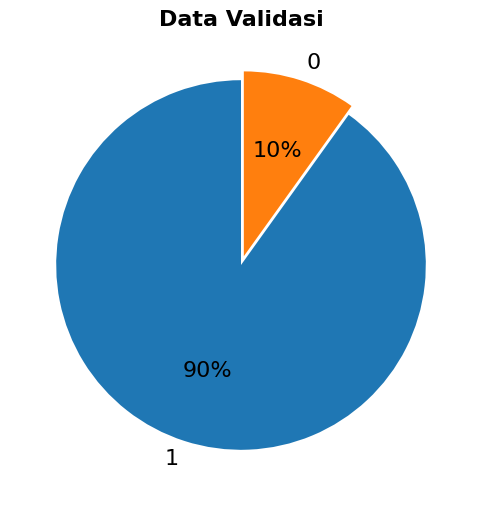

In [20]:
plot_data(y_train, title="Data Latih")
plot_data(y_test, title="Data Validasi")

# Pelatihan Data
Pada bagian ini data yang sudah di bagi menjadi dua bagian dengan proporsi 0.9:0.1 akan dilakukan pelatihan data. <br>
Sebelum menggunakan model-model yang ada secara lebih spesifik, akan dicek keakuratan model dalam memprediksi dengan menggunakan lazypredict.

In [1]:
pip install lazypredict

In [2]:
pip install --upgrade numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


  Using cached scikit_learn-0.24.0-cp39-cp39-win_amd64.whl (6.9 MB)


In [5]:
pip install --upgrade scikit-learn

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.0
    Uninstalling scikit-learn-0.24.0:
      Successfully uninstalled scikit-learn-0.24.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
from lazypredict.Supervised import LazyClassifier

In [27]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [27:05<00:00, 56.04s/it]


In [28]:
# Akan dilihat model-model yang memiliki F1 Score tertinggi
# 3 model teratas akan kita gunakan
models.reset_index().sort_values(by=["F1 Score"], ascending=False)

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
4,XGBClassifier,0.93,0.71,0.71,0.92,4.60
5,BaggingClassifier,0.91,0.70,0.70,0.90,5.61
9,LGBMClassifier,0.92,0.65,0.65,0.90,0.91
11,RandomForestClassifier,0.92,0.63,0.63,0.90,12.89
12,AdaBoostClassifier,0.91,0.62,0.62,0.90,5.48
15,ExtraTreesClassifier,0.91,0.60,0.60,0.89,10.14
14,KNeighborsClassifier,0.90,0.62,0.62,0.89,0.54
13,LinearDiscriminantAnalysis,0.90,0.62,0.62,0.88,0.85
16,CalibratedClassifierCV,0.91,0.59,0.59,0.88,69.34
6,DecisionTreeClassifier,0.88,0.69,0.69,0.88,0.87


### XGBoost

In [22]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc", "error"]

modelXG = xgb.XGBClassifier(n_estimators=150, learning_rate=0.3, max_depth=6, subsample=1)
modelXG.fit(X_train._get_numeric_data(), y_train._get_numeric_data(),
         eval_set= eval_set,
         eval_metric=eval_metric,
         verbose=True)

[0]	validation_0-auc:0.86558	validation_0-error:0.09404	validation_1-auc:0.85113	validation_1-error:0.10011
[1]	validation_0-auc:0.87524	validation_0-error:0.08883	validation_1-auc:0.85618	validation_1-error:0.09232
[2]	validation_0-auc:0.88028	validation_0-error:0.08839	validation_1-auc:0.86267	validation_1-error:0.09232
[3]	validation_0-auc:0.88621	validation_0-error:0.08748	validation_1-auc:0.86674	validation_1-error:0.09066
[4]	validation_0-auc:0.88930	validation_0-error:0.08742	validation_1-auc:0.87048	validation_1-error:0.08899
[5]	validation_0-auc:0.89203	validation_0-error:0.08745	validation_1-auc:0.87522	validation_1-error:0.08788
[6]	validation_0-auc:0.89443	validation_0-error:0.08599	validation_1-auc:0.87724	validation_1-error:0.08732
[7]	validation_0-auc:0.89702	validation_0-error:0.08497	validation_1-auc:0.87673	validation_1-error:0.08899
[8]	validation_0-auc:0.89927	validation_0-error:0.08450	validation_1-auc:0.87876	validation_1-error:0.09177
[9]	validation_0-auc:0.90241

[76]	validation_0-auc:0.97688	validation_0-error:0.04685	validation_1-auc:0.92238	validation_1-error:0.06952
[77]	validation_0-auc:0.97733	validation_0-error:0.04676	validation_1-auc:0.92261	validation_1-error:0.07008
[78]	validation_0-auc:0.97751	validation_0-error:0.04644	validation_1-auc:0.92306	validation_1-error:0.07063
[79]	validation_0-auc:0.97777	validation_0-error:0.04605	validation_1-auc:0.92343	validation_1-error:0.06952
[80]	validation_0-auc:0.97798	validation_0-error:0.04585	validation_1-auc:0.92386	validation_1-error:0.07008
[81]	validation_0-auc:0.97856	validation_0-error:0.04532	validation_1-auc:0.92421	validation_1-error:0.06841
[82]	validation_0-auc:0.97900	validation_0-error:0.04500	validation_1-auc:0.92347	validation_1-error:0.06841
[83]	validation_0-auc:0.97932	validation_0-error:0.04456	validation_1-auc:0.92360	validation_1-error:0.06841
[84]	validation_0-auc:0.97964	validation_0-error:0.04442	validation_1-auc:0.92319	validation_1-error:0.06841
[85]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

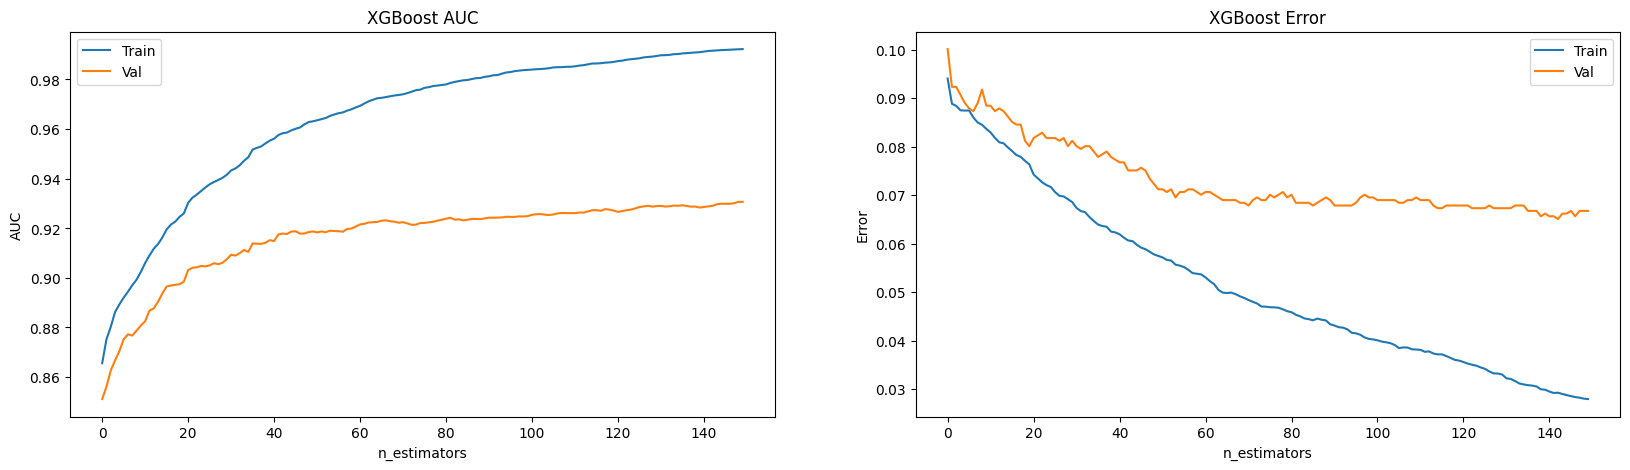

In [23]:
# Memplot antara akurasi dan loss, terlihat model ini mengalami overfitting
results = modelXG.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
ax1.plot(x_axis, results['validation_0']['auc'], label='Train')
ax1.plot(x_axis, results['validation_1']['auc'], label='Val')
ax1.legend()
ax1.set_title('XGBoost AUC')
ax1.set_ylabel("AUC")
ax1.set_xlabel("n_estimators")

ax2.plot(x_axis, results['validation_0']['error'], label='Train')
ax2.plot(x_axis, results['validation_1']['error'], label='Val')
ax2.legend()
ax2.set_title('XGBoost Error')
ax2.set_ylabel("Error")
ax2.set_xlabel("n_estimators")

plt.show()

In [24]:
# Kita ingin memprediksi probabilitas hasil prediksi untuk digunakan dalam proses ansambel
expected_y  = y_test
predicted_y_XG = modelXG.predict(X_test)
predicted_y_XG_proba = modelXG.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.76      0.47      0.58       178
           1       0.94      0.98      0.96      1620

    accuracy                           0.93      1798
   macro avg       0.85      0.73      0.77      1798
weighted avg       0.93      0.93      0.93      1798


F1 score : 0.9637243047158404
Recall : 0.9839506172839506
Precision : 0.9443127962085308


[]

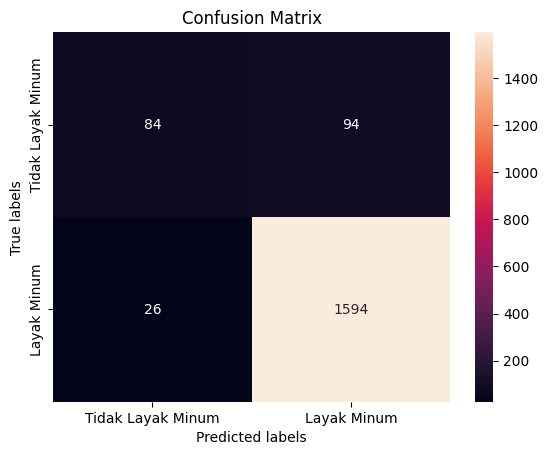

In [25]:
print(classification_report(expected_y, predicted_y_XG))

print('\nF1 score :', f1_score(expected_y, predicted_y_XG))
print('Recall :', recall_score(expected_y, predicted_y_XG))
print('Precision :', precision_score(expected_y, predicted_y_XG))

ax= plt.subplot()
sns.heatmap(confusion_matrix(expected_y, predicted_y_XG), annot=True, fmt='g')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum']); ax.yaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum'])
plt.plot()

### LGBM

In [72]:
model_lgbm = lgb.LGBMClassifier(learning_rate=0.2,  n_estimators=200)
model_lgbm.fit(X_train, y_train,
               eval_metric=["auc", "logloss"])

LGBMClassifier(learning_rate=0.2, n_estimators=200)

In [73]:
# Kita ingin memprediksi probabilitas hasil prediksi untuk digunakan dalam proses ansambel
predicted_y_LGBM = model_lgbm.predict(X_test)
predicted_y_LGBM_proba = model_lgbm.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.68      0.36      0.47       178
           1       0.93      0.98      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.81      0.67      0.71      1798
weighted avg       0.91      0.92      0.91      1798


F1 score : 0.9566787003610108
Recall : 0.9814814814814815
Precision : 0.9330985915492958


[]

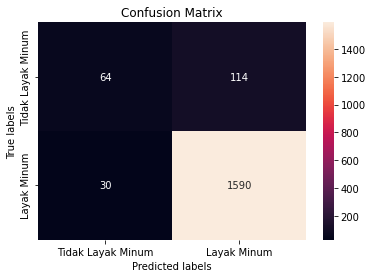

In [74]:
print(classification_report(expected_y, predicted_y_LGBM))

print('\nF1 score :', f1_score(expected_y, predicted_y_LGBM))
print('Recall :', recall_score(expected_y, predicted_y_LGBM))
print('Precision :', precision_score(expected_y, predicted_y_LGBM))

ax= plt.subplot()
sns.heatmap(confusion_matrix(expected_y, predicted_y_LGBM), annot=True, fmt='g')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum']); ax.yaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum'])
plt.plot()

### Bagging Classifier

In [75]:
from sklearn.ensemble import BaggingClassifier

model_BC = BaggingClassifier(n_estimators=200, random_state=2023, n_jobs=-1, max_features=18)
model_BC.fit(X_train, y_train)

BaggingClassifier(max_features=18, n_estimators=200, n_jobs=-1,
                  random_state=2023)

In [76]:
predicted_y_BC = model_BC.predict(X_test)
predicted_y_BC_proba = model_BC.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.83      0.25      0.39       178
           1       0.92      0.99      0.96      1620

    accuracy                           0.92      1798
   macro avg       0.88      0.62      0.67      1798
weighted avg       0.91      0.92      0.90      1798


F1 score : 0.9577883472057075
Recall : 0.9944444444444445
Precision : 0.9237385321100917


[]

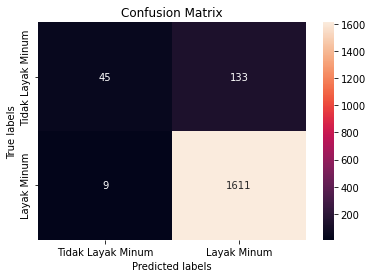

In [77]:
print(classification_report(expected_y, predicted_y_BC))

print('\nF1 score :', f1_score(expected_y, predicted_y_BC))
print('Recall :', recall_score(expected_y, predicted_y_BC))
print('Precision :', precision_score(expected_y, predicted_y_BC))

ax= plt.subplot()
sns.heatmap(confusion_matrix(expected_y, predicted_y_BC), annot=True, fmt='g')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum']); ax.yaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum'])
plt.plot()

### Memeriksa akurasi ketiga model

In [78]:
df_th = pd.DataFrame({"Data Asli" : y_test,
                   "Data Prediksi XGBoost" : predicted_y_XG,
                   "Data Prediksi LGBM" : predicted_y_LGBM,
                   "Data Prediksi BaggingClassifier" : predicted_y_BC})

def persentase(parameter) :
    total = df_th["Data Asli"].value_counts()
    totalLayak = total[1]
    totalTidaklayak = total[0]
    t0 = sum((df_th["Data Asli"] == 0) & (df_th[parameter] == 0))
    print("Total tidak layak benar diprediksi dari {} data adalah {:.2%}".format(df_th.shape[0], t0/totalTidaklayak))
    print("Total tidak layak salah diprediksi dari {} data adalah {:.2%}".format(df_th.shape[0], (totalTidaklayak-t0)/totalTidaklayak))
    t1 = sum((df_th["Data Asli"] == 1) & (df_th[parameter] == 1))
    print()
    print("Total layak benar diprediksi dari {} data adalah {:.2%}".format(df_th.shape[0], t1/totalLayak))
    print("Total layak salah diprediksi dari {} data adalah {:.2%}".format(df_th.shape[0], (totalLayak-t1)/totalLayak))
    print()
    ta = t0 + t1
    print('total prediksi benar data secara keseluruhan dari {} data adalah {:.2%}'.format(df_th.shape[0], ta/sum(total)))

In [80]:
# Memanggil fungsi persentase terhadap masing-masing prediksi model
print("XGBoost Model")
persentase("Data Prediksi XGBoost")

print("\nLGBM Model")
persentase("Data Prediksi LGBM")

print("\nBaggingClassifier Model")
persentase("Data Prediksi BaggingClassifier")

XGBoost Model
Total tidak layak benar diprediksi dari 1798 data adalah 47.19%
Total tidak layak salah diprediksi dari 1798 data adalah 52.81%

Total layak benar diprediksi dari 1798 data adalah 98.40%
Total layak salah diprediksi dari 1798 data adalah 1.60%

total prediksi benar data secara keseluruhan dari 1798 data adalah 93.33%

LGBM Model
Total tidak layak benar diprediksi dari 1798 data adalah 35.96%
Total tidak layak salah diprediksi dari 1798 data adalah 64.04%

Total layak benar diprediksi dari 1798 data adalah 98.15%
Total layak salah diprediksi dari 1798 data adalah 1.85%

total prediksi benar data secara keseluruhan dari 1798 data adalah 91.99%

BaggingClassifier Model
Total tidak layak benar diprediksi dari 1798 data adalah 25.28%
Total tidak layak salah diprediksi dari 1798 data adalah 74.72%

Total layak benar diprediksi dari 1798 data adalah 99.44%
Total layak salah diprediksi dari 1798 data adalah 0.56%

total prediksi benar data secara keseluruhan dari 1798 data adalah

# Ensemble Learning
Melakukan ensemble learning terhadap ketiga model yaitu XGBoost, LGBM, dan BaggingClassifier dengan memanfaatkan propabilitas hasil prediksi.

In [81]:
wadah = []
arr = ((predicted_y_XG_proba + predicted_y_LGBM_proba + predicted_y_BC_proba)/3)

for i in arr :
    wadah.append(np.argmax(i))

              precision    recall  f1-score   support

           0       0.78      0.38      0.51       178
           1       0.94      0.99      0.96      1620

    accuracy                           0.93      1798
   macro avg       0.86      0.69      0.74      1798
weighted avg       0.92      0.93      0.92      1798


F1 score : 0.9612728910237166
Recall : 0.9882716049382716
Precision : 0.9357101110461719


[]

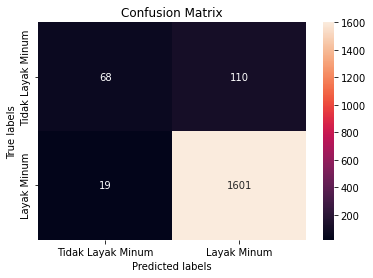

In [82]:
print(classification_report(expected_y, wadah))

print('\nF1 score :', f1_score(expected_y, wadah))
print('Recall :', recall_score(expected_y, wadah))
print('Precision :', precision_score(expected_y, wadah))

ax= plt.subplot()
sns.heatmap(confusion_matrix(expected_y, wadah), annot=True, fmt='g')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum']); ax.yaxis.set_ticklabels(['Tidak Layak Minum','Layak Minum'])
plt.plot()

In [83]:
df_th["Data Prediksi Ensemble"] = wadah

print("\nEnsemble")
persentase("Data Prediksi Ensemble")


Ensemble
Total tidak layak benar diprediksi dari 1798 data adalah 38.20%
Total tidak layak salah diprediksi dari 1798 data adalah 61.80%

Total layak benar diprediksi dari 1798 data adalah 98.83%
Total layak salah diprediksi dari 1798 data adalah 1.17%

total prediksi benar data secara keseluruhan dari 1798 data adalah 92.83%


In [84]:
# Membuat fungsi ensemble untuk memprediksi test.csv
def ensemble_predict(param) :
    predicted_y_XG_proba = modelXG.predict_proba(param)
    predicted_y_LGBM_proba = model_lgbm.predict_proba(param)
    predicted_y_BC_proba = model_BC.predict_proba(param)
    
    arr = ((predicted_y_XG_proba + predicted_y_LGBM_proba + predicted_y_BC_proba)/3)
    
    wadah = []
    for i in arr :
        wadah.append(np.argmax(i))
    return wadah

# Submission

In [ ]:
test = pd.read_csv("D:/Kuliah/Gammafest 2023/Dataset/test.csv")
submission = pd.read_csv("D:/Kuliah/Gammafest 2023/Dataset/sample_submission.csv")

In [ ]:
#test.drop(["id"], axis=1, inplace=True)
test.columns = df.columns[0:39]
test

In [ ]:
missing_check(test)

In [ ]:
y_hat = ensemble_predict(test)
y_hat

In [ ]:
submission["DC201"] = y_hat
submission["DC201"] = submission["DC201"].map({1 : "Layak Minum", 0 : "Tidak Layak Minum"})
submission

In [ ]:
submission.to_csv("submission_Final.csv", index=False)